<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK14/blob/main/Week_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carrefour Marketing Analysis

## Overview
**i. Understanding the context**  
Carrefour Kenya and is currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). The project has been divided into four parts where we'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights. 

**ii. Specifying the objectives**  
The specific objective of this project is:  
> To perform various unsupervised learing techniques that will draw insights that will inform the marketing department on the most relevant marketing strategies

**iii. Defining the metric for success**  
The project will be considered successful when we are able to draw meaningful insights that would be benefit to the marketing department  

**iv. data relevance**  
Relevant datasets have been retrieved from:
* http://bit.ly/CarreFourdataset
* http://bit.ly/SupermarketdatasetII
* http://bit.ly/CarreFourSalesdataset

**v. Project design**  
In order to work on the above problem, we need to do the following:

a. Acquire the datasets with appropriate data for our project  
b. Perform data cleaning   
d. Implement unsupervised learning techniques
e. Give conclusions and recommendations

## Part 1 & 2  
  
**Objectives**  
To perform feature selection and dimensionality reduction so as to reduce/eliminate redundancy within the dataset

## Loading relevant packages

In [1]:
library("data.table")
library("tidyverse")
devtools::install_github("moodymudskipper/cutr")
library(cutr)
devtools::install_github("paulponcet/modeest")
library(modeest)
install.packages('moments')
library(moments)
install.packages('janitor')
library(janitor)
install.packages('ggcorrplot')
library('ggcorrplot')
install.packages('caret')
library('caret')


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()




✔  checking for file ‘/tmp/RtmpuuqS76/remotes3f8327e6a/moodymudskipper-cutr-7b8e9cd/DESCRIPTION’
─  preparing ‘cutr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘cutr_0.0.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




timeDate   (NA -> 3043.102 ) [CRAN]
clue       (NA -> 0.3-59   ) [CRAN]
stabledist (NA -> 0.7-1    ) [CRAN]
rmutil     (NA -> 1.1.5    ) [CRAN]
gss        (NA -> 2.2-2    ) [CRAN]
timeSeries (NA -> 3062.100 ) [CRAN]
statip     (NA -> 0.2.3    ) [CRAN]
stable     (NA -> 1.1.4    ) [CRAN]
fBasics    (NA -> 3042.89.1) [CRAN]


Installing 9 packages: timeDate, clue, stabledist, rmutil, gss, timeSeries, statip, stable, fBasics

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpuuqS76/remotes3f3a46411c/paulponcet-modeest-a168f94/DESCRIPTION’
─  preparing ‘modeest’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘modeest_2.4.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following object is masked from ‘package:modeest’:

    skewness


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required pack

## Loading the dataset

In [ ]:
# load the dataset using fread() funcion and instantiate it
data1 <- fread('http://bit.ly/CarreFourDataset')

## Reading the data

In [ ]:
# preview the first few records in the dataset
head(data1)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
# find number of rows and columns in the dataframe using dim() function
dim(data1)

[1] 1000   16

There are 1000 rows and 16 columns in the dataframe

In [ ]:
# check the data1 type of each variable using sapply() function
sapply(data1, class)

Invoice ID                  Branch           Customer type 
            "character"             "character"             "character" 
                 Gender            Product line              Unit price 
            "character"             "character"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"             "character" 
                   Time                 Payment                    cogs 
            "character"             "character"               "numeric" 
gross margin percentage            gross income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric"

## data cleaning

In [ ]:
# Standardize column names by lowering the case and replacing the spaces with underscores

# replace the spaces with underscores using gsub() function
names(data1) <- gsub(" ","_", names(data1))

# lower the case of the column names using tolower() function for standardization
names(data1) <- tolower(names(data1))

# display the column names to confirm the changes
colnames(data1)

[1] "invoice_id"              "branch"                 
 [3] "customer_type"           "gender"                 
 [5] "product_line"            "unit_price"             
 [7] "quantity"                "tax"                    
 [9] "date"                    "time"                   
[11] "payment"                 "cogs"                   
[13] "gross_margin_percentage" "gross_income"           
[15] "rating"                  "total"

In [ ]:
# find number of duplicated rows using anyDuplicated() function
anyDuplicated(data1)

[1] 0

There are no duplicated rows

In [ ]:
# find the number of missing values in each column using is.na() and colSums() functions
colSums(is.na(data1))

invoice_id                  branch           customer_type 
                      0                       0                       0 
                 gender            product_line              unit_price 
                      0                       0                       0 
               quantity                     tax                    date 
                      0                       0                       0 
                   time                 payment                    cogs 
                      0                       0                       0 
gross_margin_percentage            gross_income                  rating 
                      0                       0                       0 
                  total 
                      0

There are no  missing values

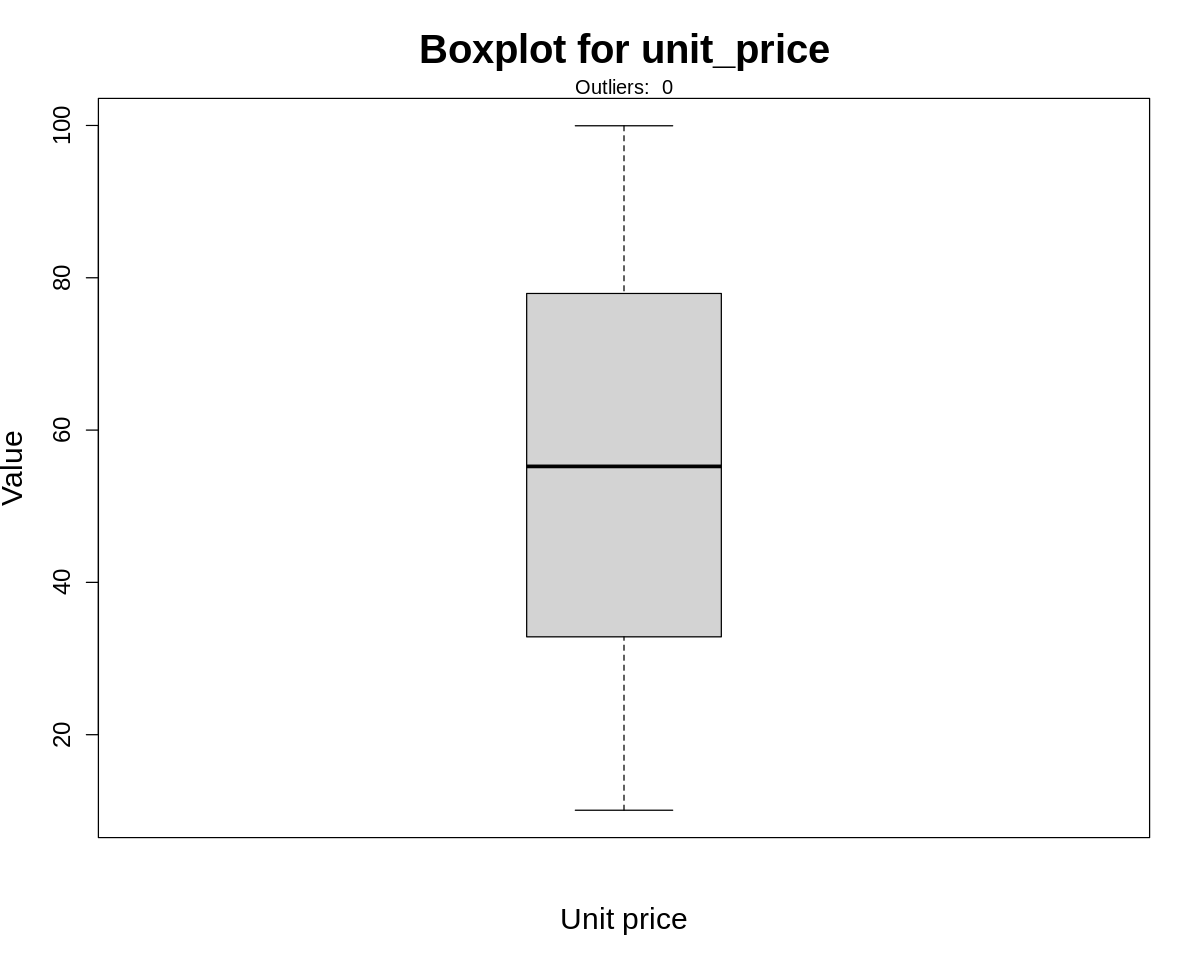

In [ ]:
# plot a boxplot to check for outliers in the 'unit_price' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$unit_, main="Boxplot for unit_price", xlab = "Unit price", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_price <- boxplot.stats(data1$unit_price)$out
mtext(paste("Outliers: ", paste(length(outlier_price), collapse=", ")), cex=1)

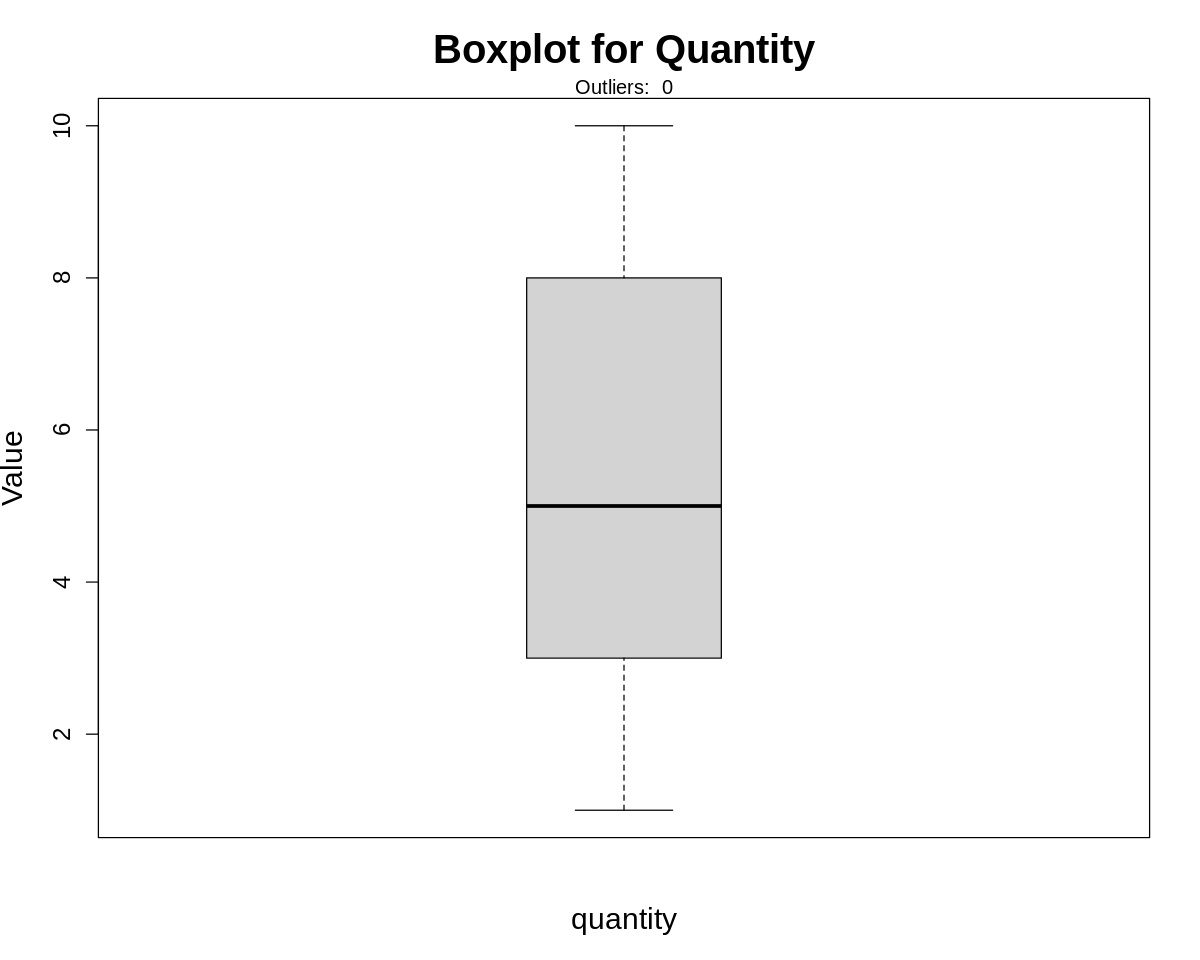

In [ ]:
# plot a boxplot to check for outliers in the 'quantity' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$quantity, main="Boxplot for Quantity", xlab = "quantity", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_quantity <- boxplot.stats(data1$quantity)$out
mtext(paste("Outliers: ", paste(length(outlier_quantity), collapse=", ")), cex=1)

No outliers

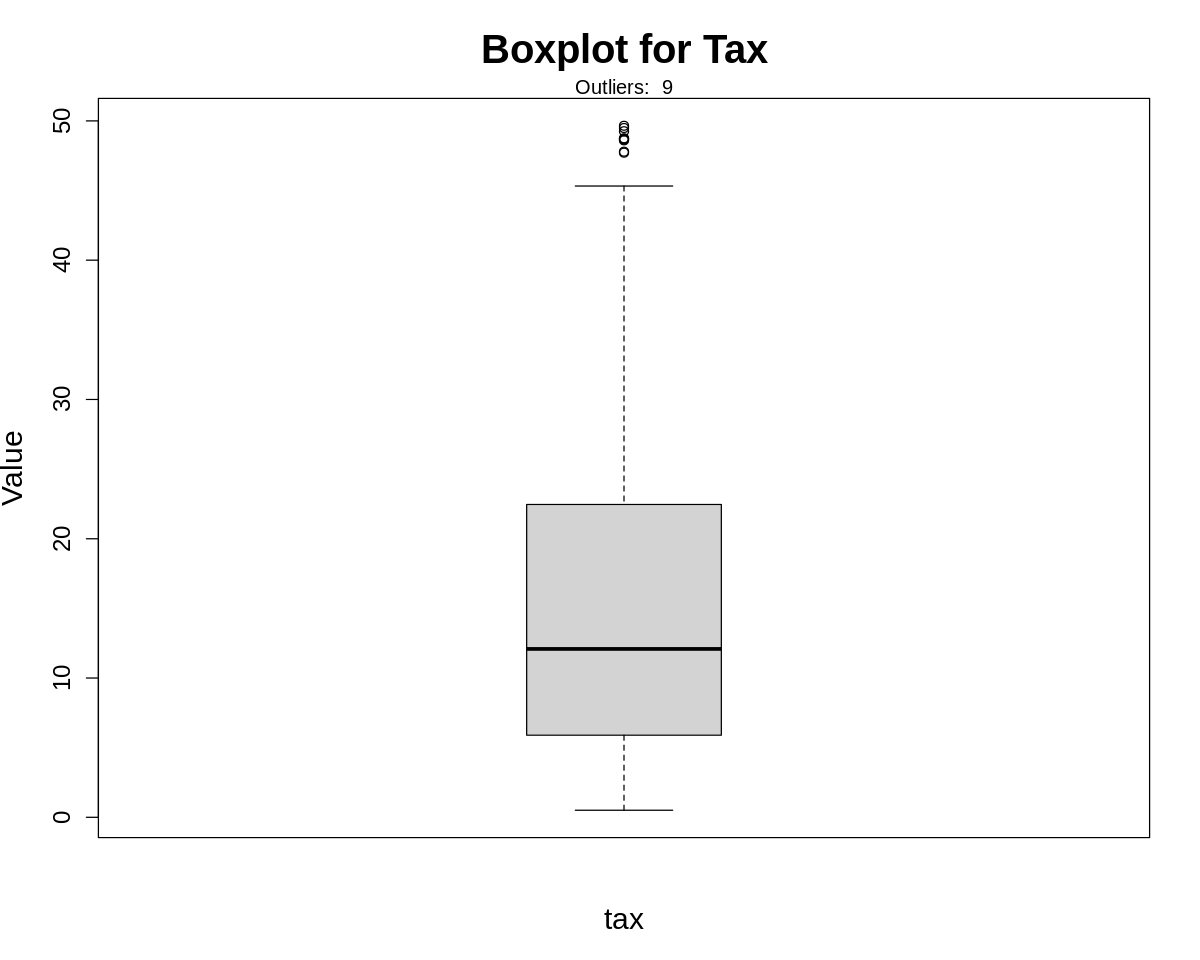

In [ ]:
# plot a boxplot to check for outliers in the 'tax' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$tax, main="Boxplot for Tax", xlab = "tax", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_tax <- boxplot.stats(data1$tax)$out
mtext(paste("Outliers: ", paste(length(outlier_tax), collapse=", ")), cex=1)

There are 9 outliers in the 'tax' column

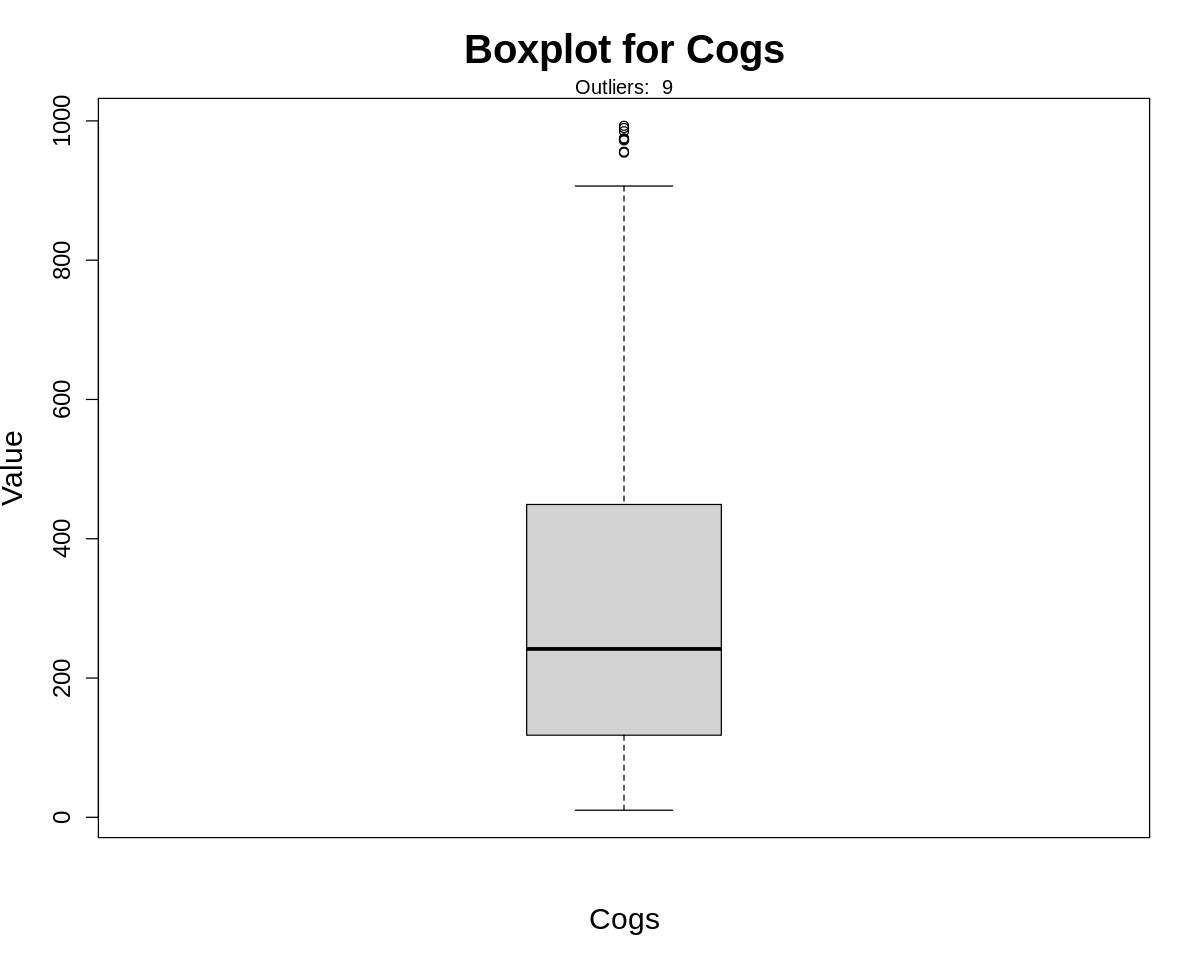

In [ ]:
# plot a boxplot to check for outliers in the 'cogs' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$cogs, main="Boxplot for Cogs", xlab = "Cogs", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_cogs <- boxplot.stats(data1$cogs)$out
mtext(paste("Outliers: ", paste(length(outlier_cogs), collapse=", ")), cex=1)

There are 9 outliers in the 'cogs' column

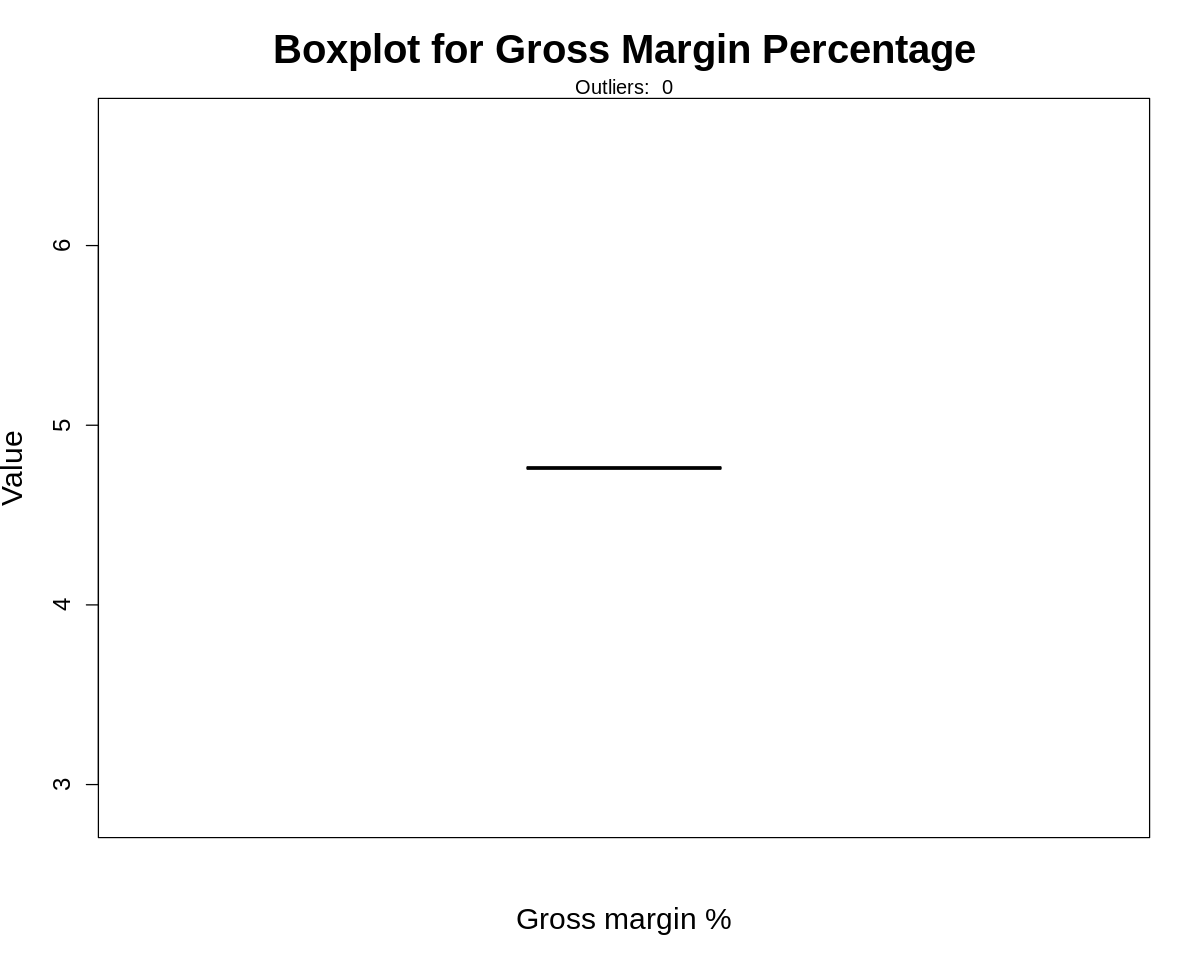

In [ ]:
# plot a boxplot to check for outliers in the 'gross_margin_percentage' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$gross_margin_percentage, main="Boxplot for Gross Margin Percentage", xlab = "Gross margin %", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_gmp <- boxplot.stats(data1$gross_margin_percentage)$out
mtext(paste("Outliers: ", paste(length(outlier_gmp), collapse=", ")), cex=1)

There are no outliers in the 'gross_margin_percentage' column

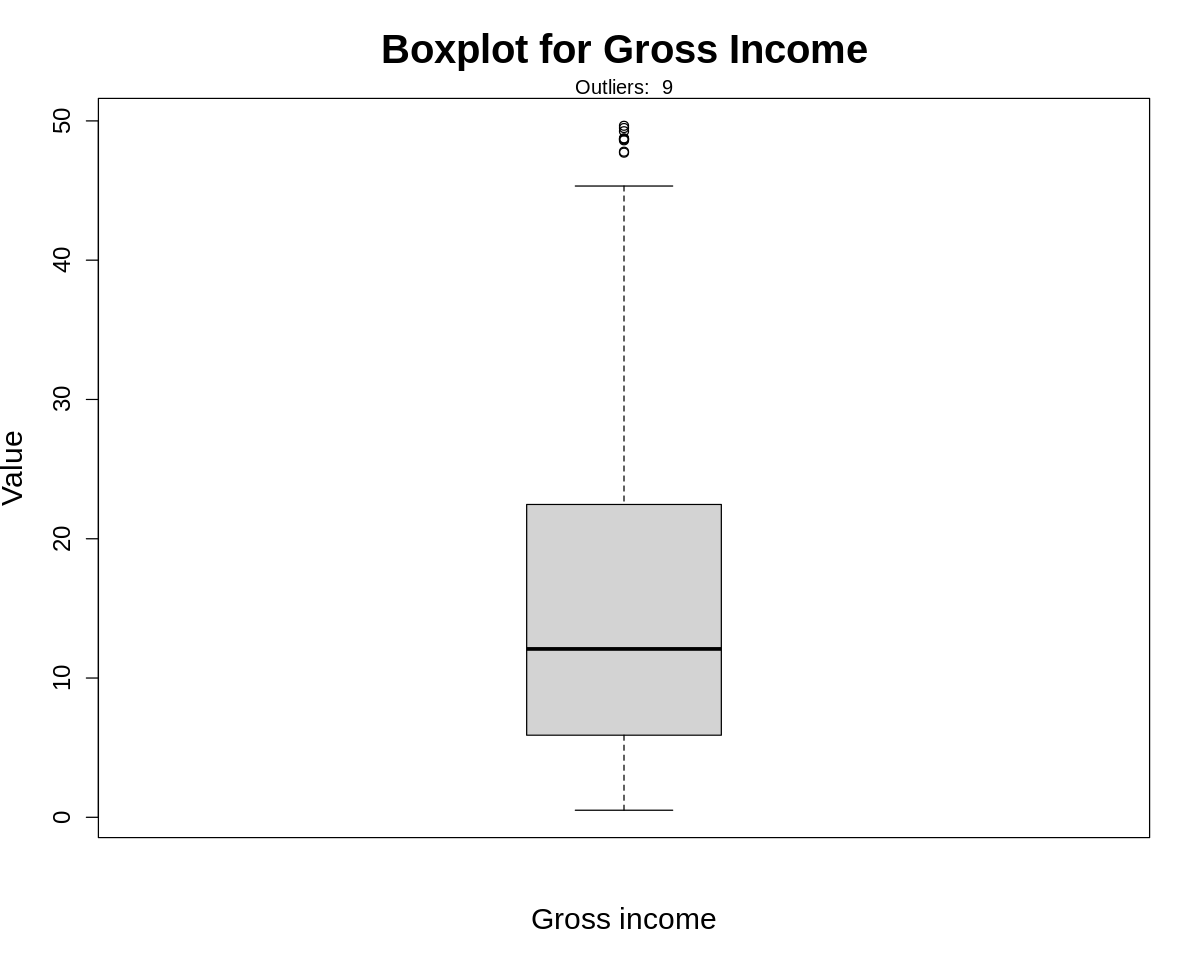

In [ ]:
# plot a boxplot to check for outliers in the 'gross_income' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$gross_income, main="Boxplot for Gross Income", xlab = "Gross income", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_income <- boxplot.stats(data1$gross_income)$out
mtext(paste("Outliers: ", paste(length(outlier_income), collapse=", ")), cex=1)

There are 9 outliers in the 'gross_income' column

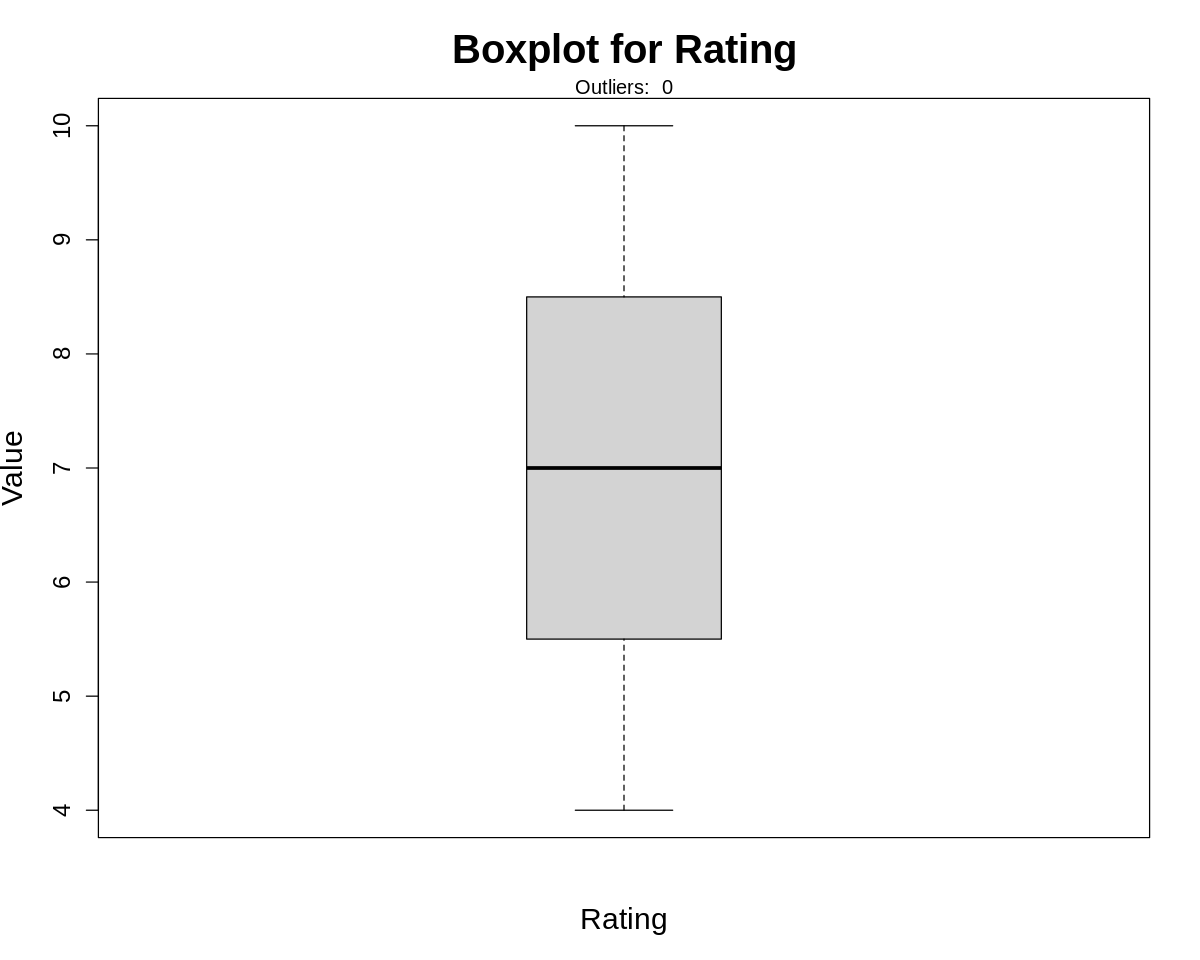

In [ ]:
# plot a boxplot to check for outliers in the 'rating' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$rating, main="Boxplot for Rating", xlab = "Rating", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_rating <- boxplot.stats(data1$rating)$out
mtext(paste("Outliers: ", paste(length(outlier_rating), collapse=", ")), cex=1)

There are no outliers in the 'rating' column

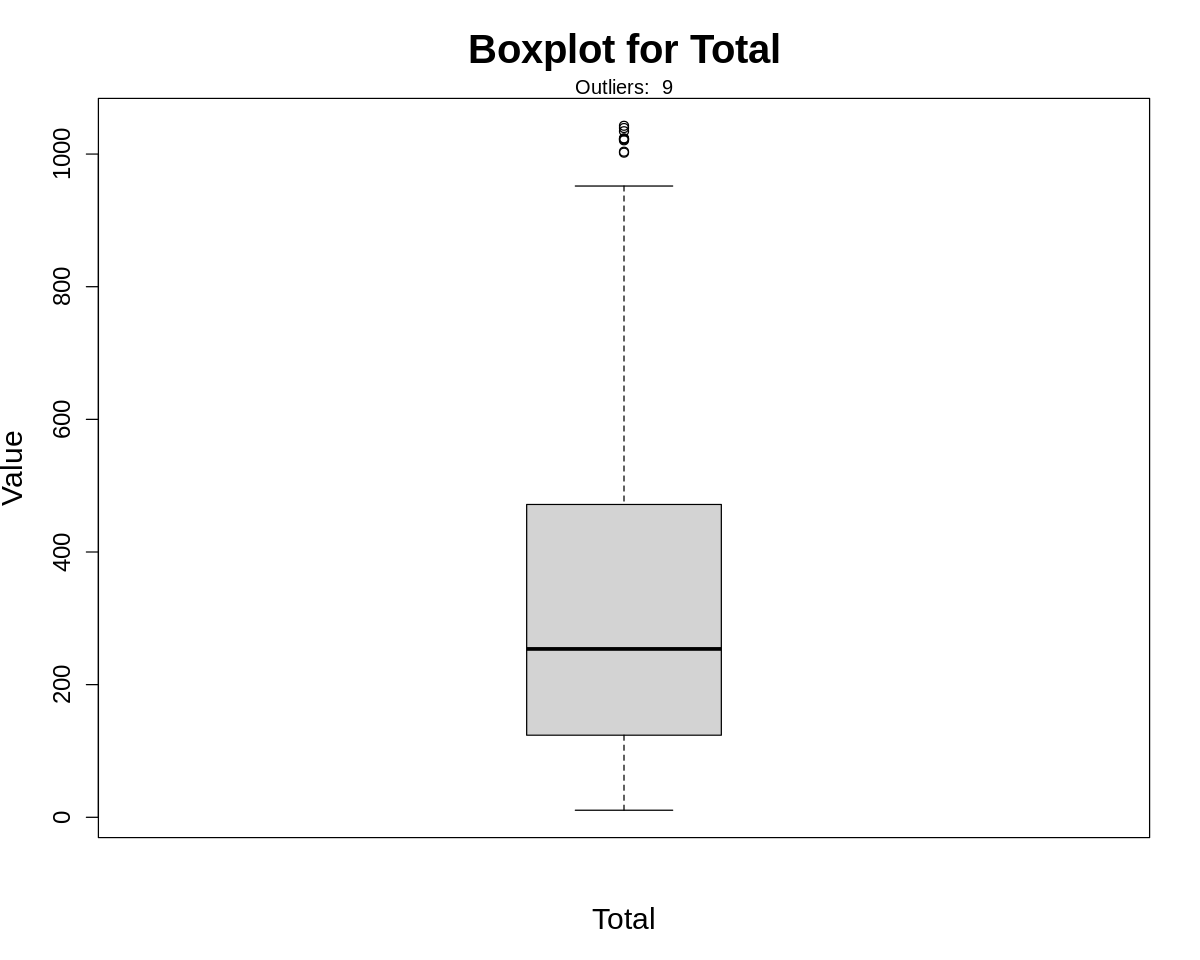

In [ ]:
# plot a boxplot to check for outliers in the 'total' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data1$total, main="Boxplot for Total", xlab = "Total", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_total <- boxplot.stats(data1$total)$out
mtext(paste("Outliers: ", paste(length(outlier_total), collapse=", ")), cex=1)

There are 9 outliers in the 'total' column

In [ ]:
# check for anomalies in the 'branch' column by scrutinizing its unique values 
print(unique(data1$branch))

[1] "A" "C" "B"


There are 3 unique values and no anomalies in the 'branch' column

In [ ]:
# check for anomalies in the 'customer_type' column by scrutinizing its unique values 
print(unique(data1$customer_type))

[1] "Member" "Normal"


There are 2 unique values and no anomalies in the 'customer_type' column

In [ ]:
# check for anomalies in the 'gender' column by scrutinizing its unique values 
print(unique(data1$gender))

[1] "Female" "Male"  


There are 2 unique values and no anomalies in the 'gender' column

In [ ]:
# check for anomalies in the 'product_line' column by scrutinizing its unique values 
print(unique(data1$product_line))

[1] "Health and beauty"      "Electronic accessories" "Home and lifestyle"    
[4] "Sports and travel"      "Food and beverages"     "Fashion accessories"   


There are 6 unique values and no anomalies in the 'product_line' column

In [ ]:
# check for anomalies in the 'payment' column by scrutinizing its unique values 
print(unique(data1$payment))

[1] "Ewallet"     "Cash"        "Credit card"


There are 3 unique values and no anomalies in the 'payment' column

In [ ]:
# removing irrelevant columns
setDT(data1)[, c( "invoice_id", 'date', 'time', 'tax', 'gross_margin_percentage') := NULL]
# check the dimensions of the dataframe after cleaning
dim(data1)

[1] 1000   11

## Univariate analysis
Univariate analysis will help us gain insights on the general characteristics of the individual variables in the dataset.

### Numerical variables



#### Measures of central tendency and measures of dispersion

In [ ]:
# identify numerical variables in the data1frame
num_col <- unlist(lapply(data1, is.numeric))

# create a subset that contains the numerical variables
data_num <- subset(data1, select=num_col) 

In [ ]:
# compute the measures of cenral tendancy and the measures of dispersion of the numerical variables and contain them in a data1frame
stats <- data.frame(
  Mean = apply(data_num, 2, mean), 
  Median = apply(data_num, 2, median), 
  Min = apply(data_num, 2, min),  
  Max = apply(data_num, 2, max),    
  Variance= apply(data_num, 2, var),  
  Std = apply(data_num, 2, sd),
  Skewness = apply(data_num, 2, skewness), 
  Kurtosis = apply(data_num, 2, kurtosis)) 

# round off the values to 2 decimal places and display the data1frame
stats <- round(stats, 2)
stats

,Mean,Median,Min,Max,Variance,Std,Skewness,Kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
unit_price,55.67,55.23,10.08,99.96,701.97,26.49,0.01,1.78
quantity,5.51,5.00,1.00,10.00,8.55,2.92,0.01,1.78
cogs,307.59,241.76,10.17,993.00,54838.64,234.18,0.89,2.91
gross_income,15.38,12.09,0.51,49.65,137.10,11.71,0.89,2.91
rating,6.97,7.00,4.00,10.00,2.95,1.72,0.01,1.85
total,322.97,253.85,10.68,1042.65,60459.60,245.89,0.89,2.91


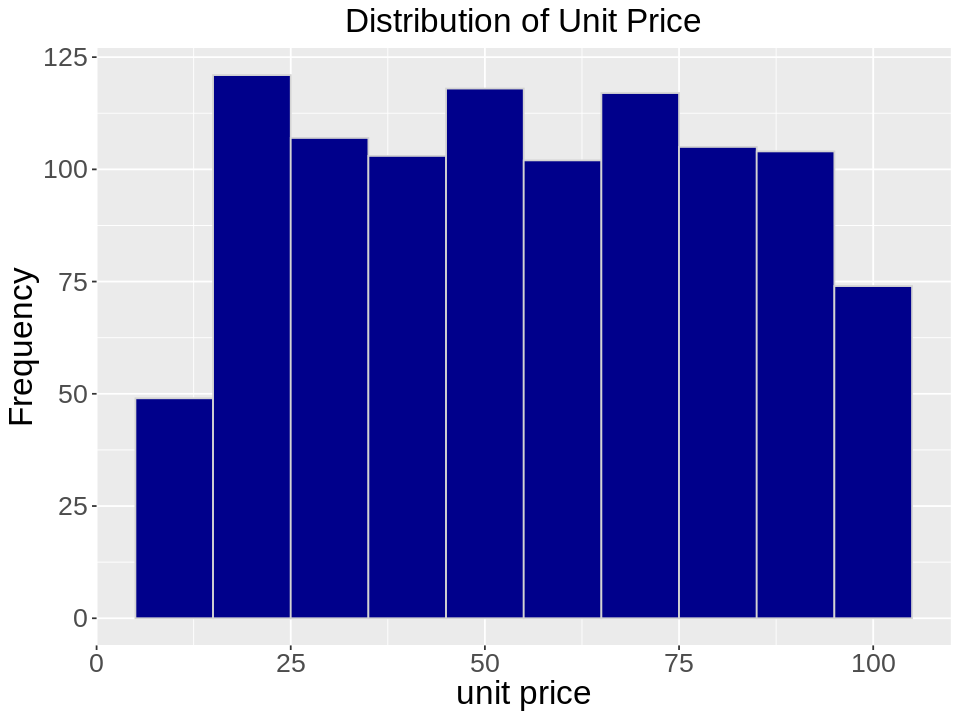

In [ ]:
# plot a histogram to visualize the distribution of values in 'unit_price' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data1 %>% ggplot(aes(x = unit_price ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 10) +
    labs(title = "Distribution of Unit Price", x = "unit price", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

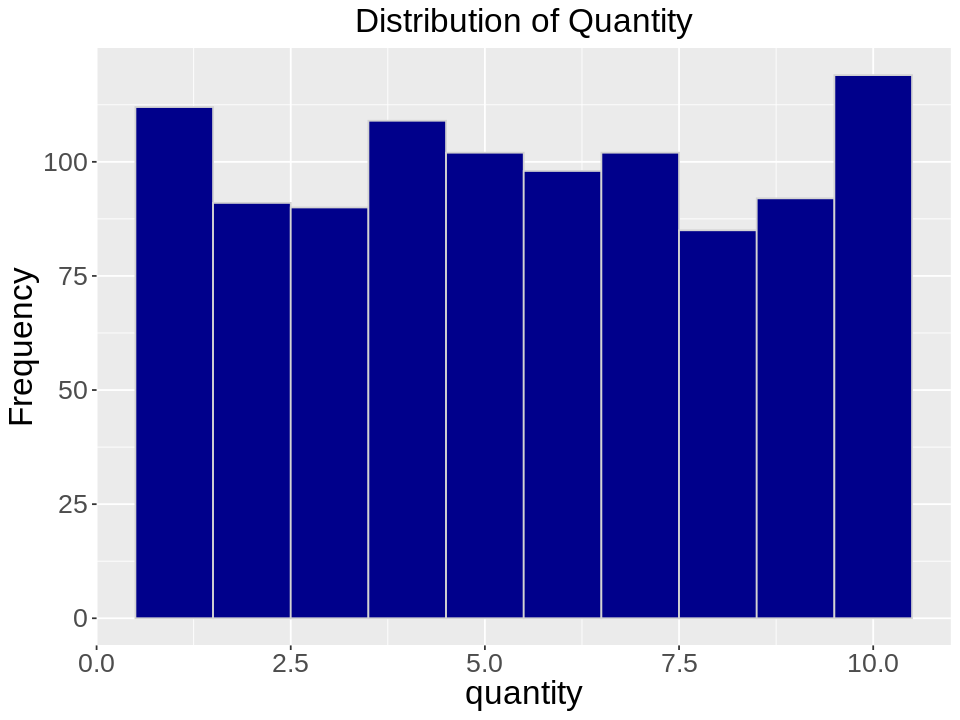

In [ ]:
# plot a histogram to visualize the distribution of values in 'quantity' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data1 %>% ggplot(aes(x = quantity ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 1) +
    labs(title = "Distribution of Quantity", x = "quantity", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

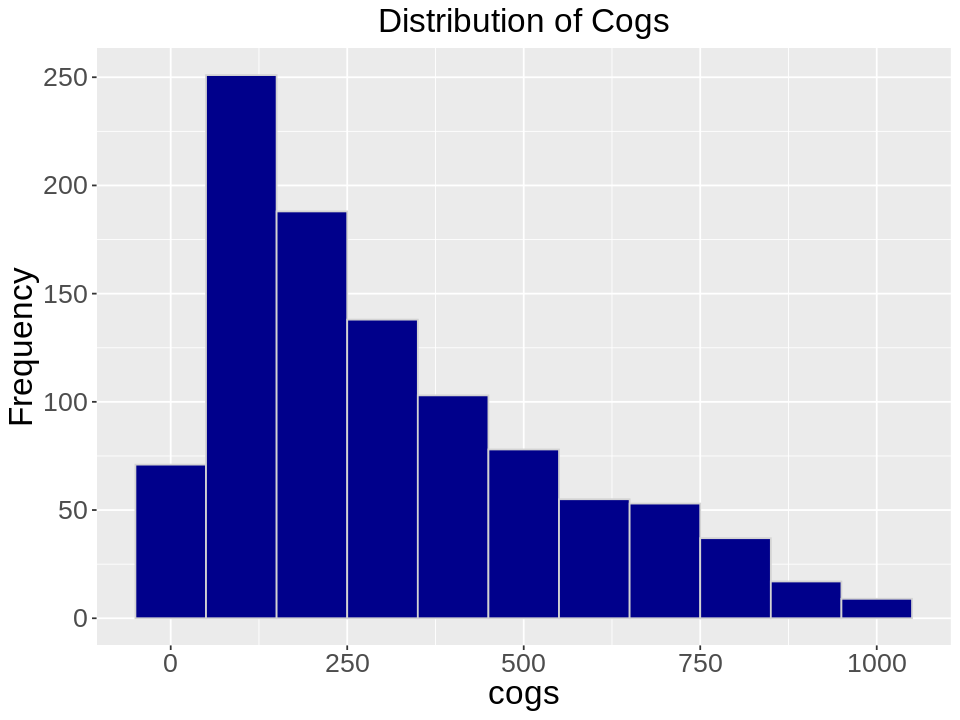

In [ ]:
# plot a histogram to visualize the distribution of values in 'cogs' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data1 %>% ggplot(aes(x = cogs ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 100) +
    labs(title = "Distribution of Cogs", x = "cogs", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

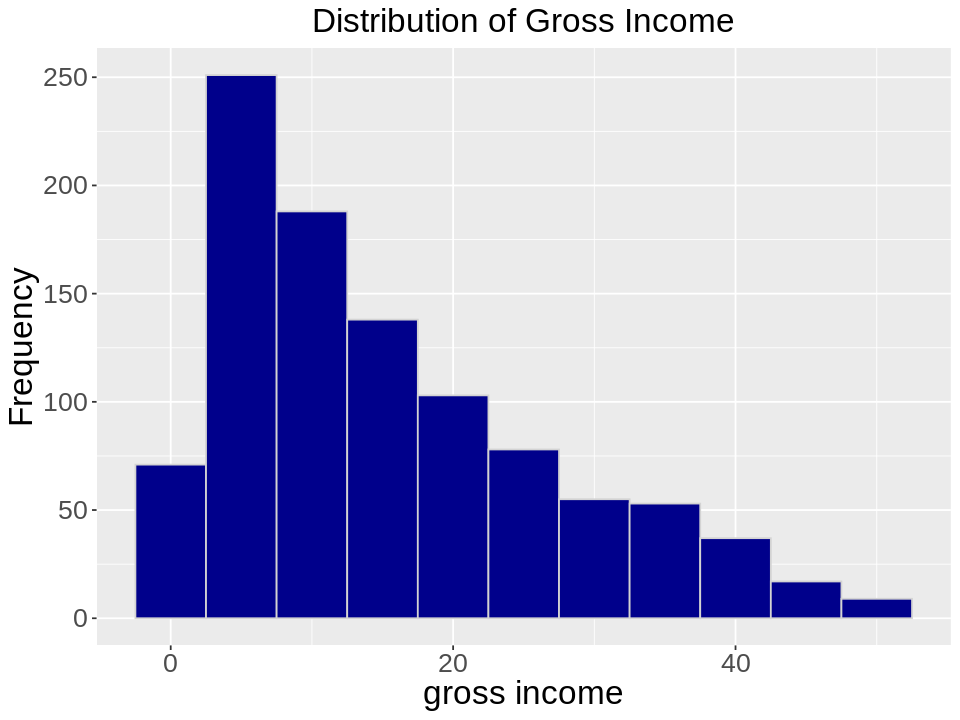

In [ ]:
# plot a histogram to visualize the distribution of values in 'gross_income' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data1 %>% ggplot(aes(x = gross_income ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 5) +
    labs(title = "Distribution of Gross Income", x = "gross income", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

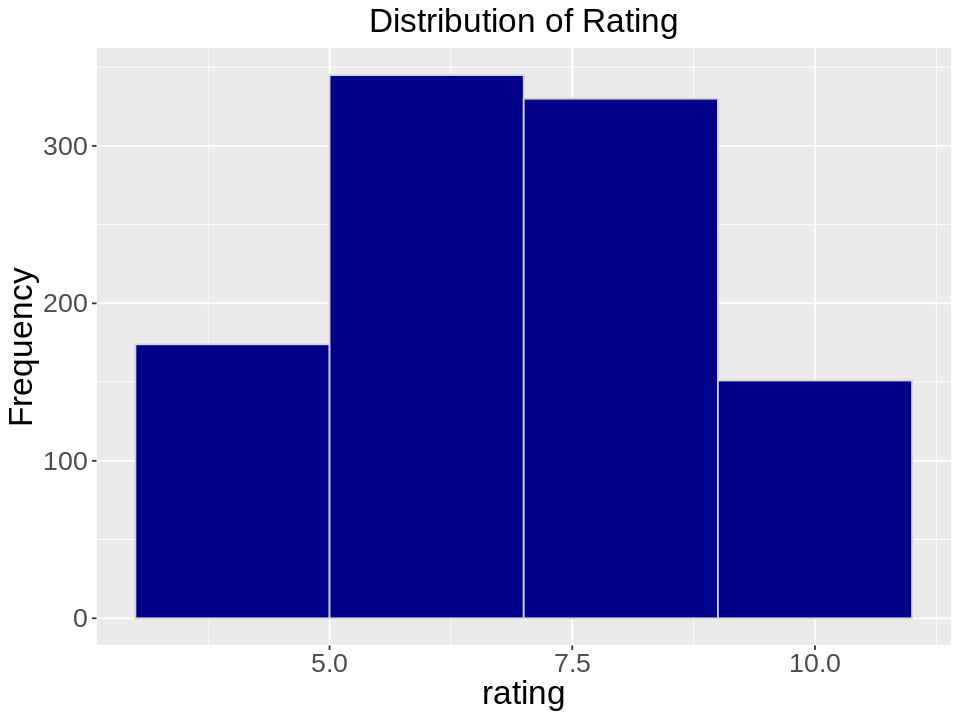

In [ ]:
# plot a histogram to visualize the distribution of values in 'rating' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data1 %>% ggplot(aes(x = rating ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 2) +
    labs(title = "Distribution of Rating", x = "rating", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

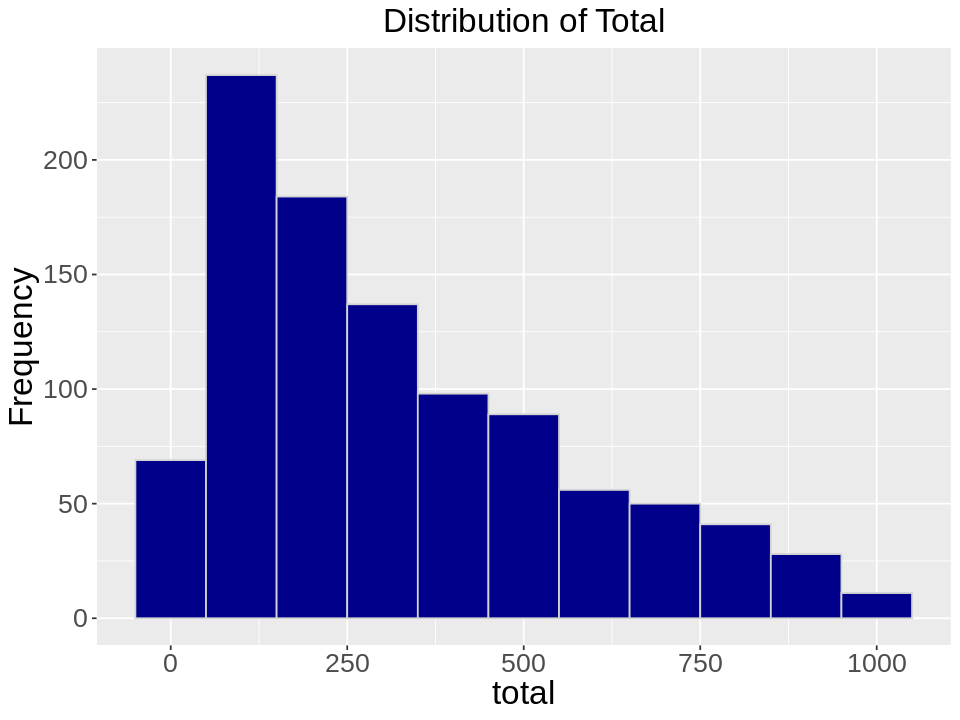

In [ ]:
# plot a histogram to visualize the distribution of values in 'total' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data1 %>% ggplot(aes(x = total ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 100) +
    labs(title = "Distribution of Total", x = "total", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

### Categorical variables

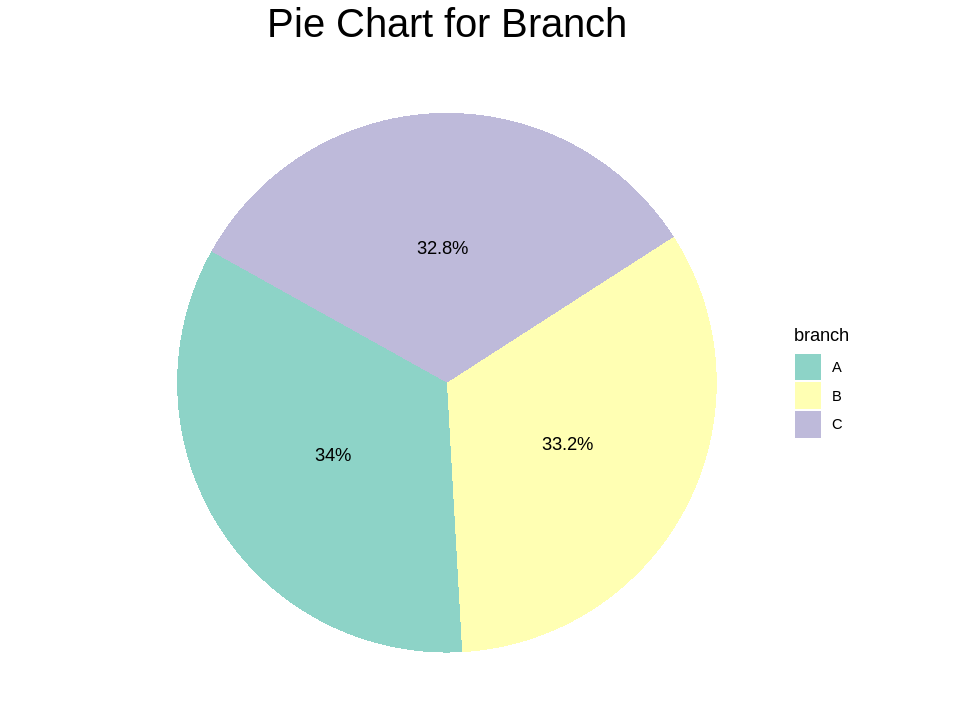

In [ ]:
# plot a pie chart to visualize the proportion of values in the 'branch' column
data.branch = data1 %>% 
  filter(branch != "NA") %>% 
  group_by(branch) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(branch)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.branch, 
       aes(x = "", y = percentage, fill = branch))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set3") + labs(title= 'Pie Chart for Branch') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


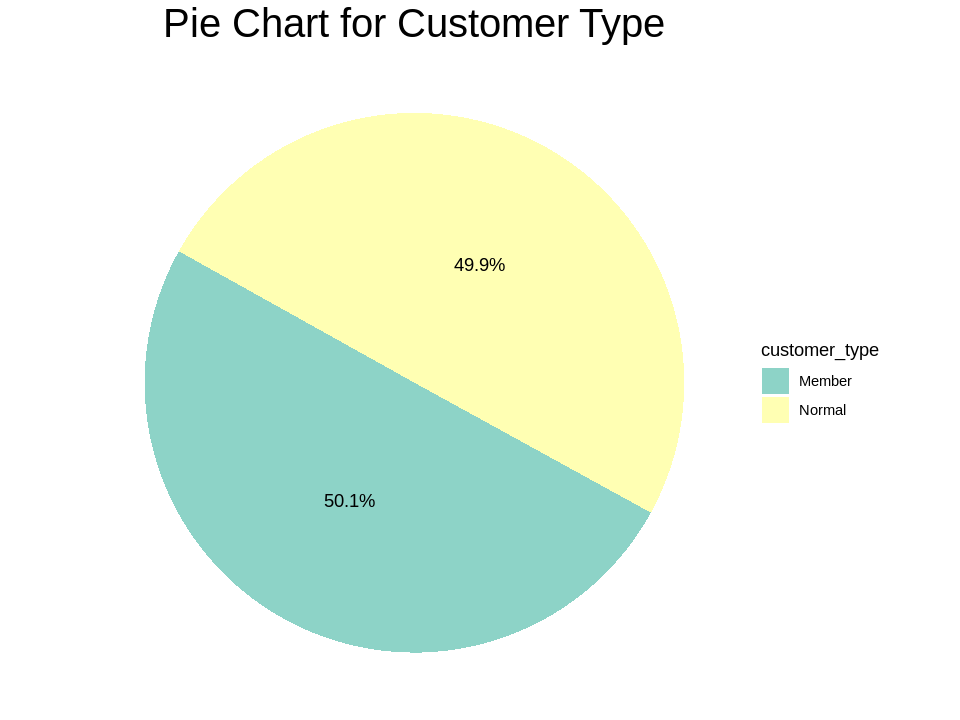

In [ ]:
# plot a pie chart to visualize the proportion of values in the 'customer_type' column
data.customer_type = data1 %>% 
  filter(customer_type != "NA") %>% 
  group_by(customer_type) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(customer_type)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.customer_type, 
       aes(x = "", y = percentage, fill = customer_type))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set3") + labs(title= 'Pie Chart for Customer Type') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


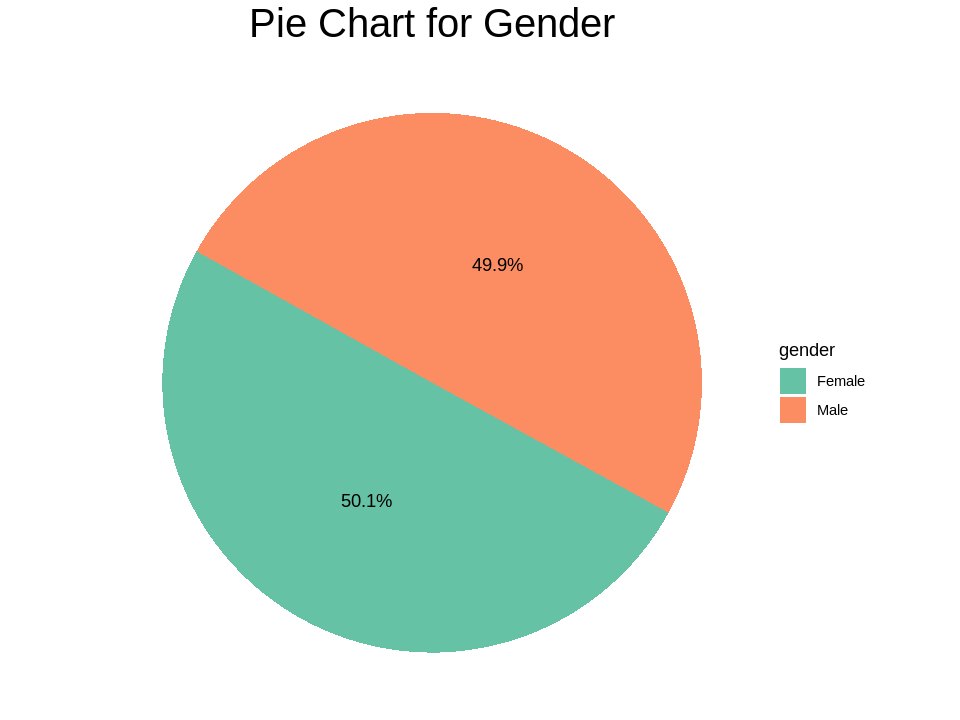

In [ ]:
# plot a pie chart to visualize the proportion of values in the 'gender' column
data.gender = data1 %>% 
  filter(gender != "NA") %>% 
  group_by(gender) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(gender)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.gender, 
       aes(x = "", y = percentage, fill = gender))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set2") + labs(title= 'Pie Chart for Gender') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


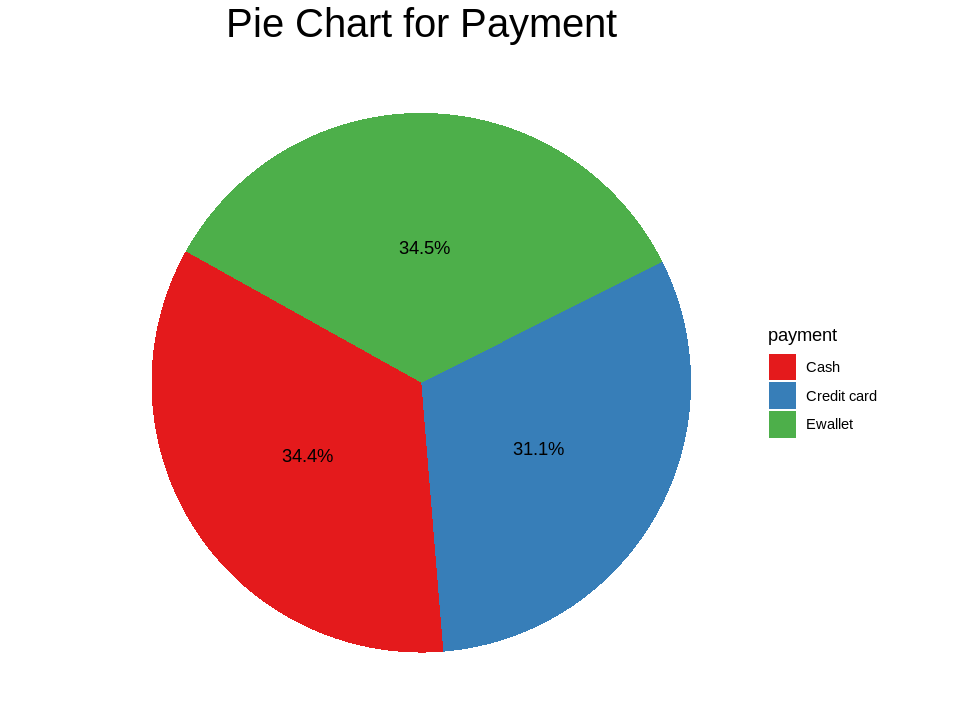

In [ ]:
# plot a pie chart to visualize the proportion of values in the 'payment' column
data.payment = data1 %>% 
  filter(payment != "NA") %>% 
  group_by(payment) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(payment)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.payment, 
       aes(x = "", y = percentage, fill = payment))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set1") + labs(title= 'Pie Chart for Payment') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


data1$product_line,n,percent
<chr>,<dbl>,<dbl>
Electronic accessories,170,0.170
Fashion accessories,178,0.178
Food and beverages,174,0.174
Health and beauty,152,0.152
Home and lifestyle,160,0.160
Sports and travel,166,0.166


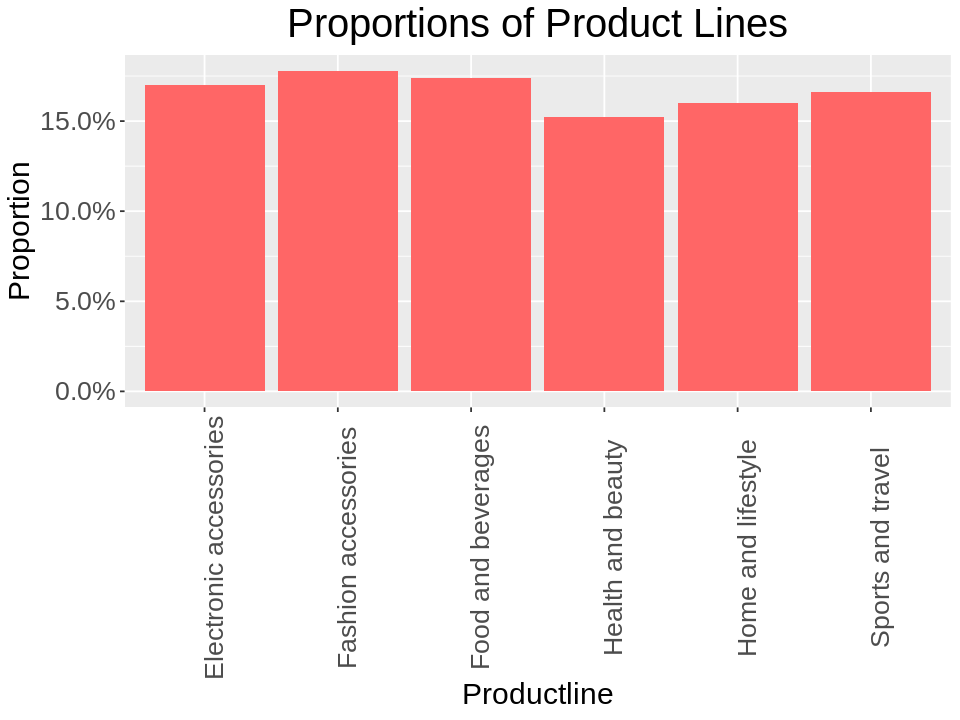

In [ ]:
# plot a bar chart to visualize the proportion of values in 'product_line' column
ggplot(data1, aes(product_line)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Product Lines', x='Productline', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24), axis.text.x = element_text(angle = 90))
# create a frequency table to get the actual figures of frequencies of parts of month using tabyl function
tabyl(data1$product_line, sort = TRUE)

General observations

- Normal members are slightly more than members
- Males are slightly more than females
- Slightly more customers use ewallets than cash for payment and the remaining 31.1% use credit cards
- Fashion accessories is the most popular product line and


## Bivariate analysis  
Bivariate analysis will help us establish the relationship between the variables

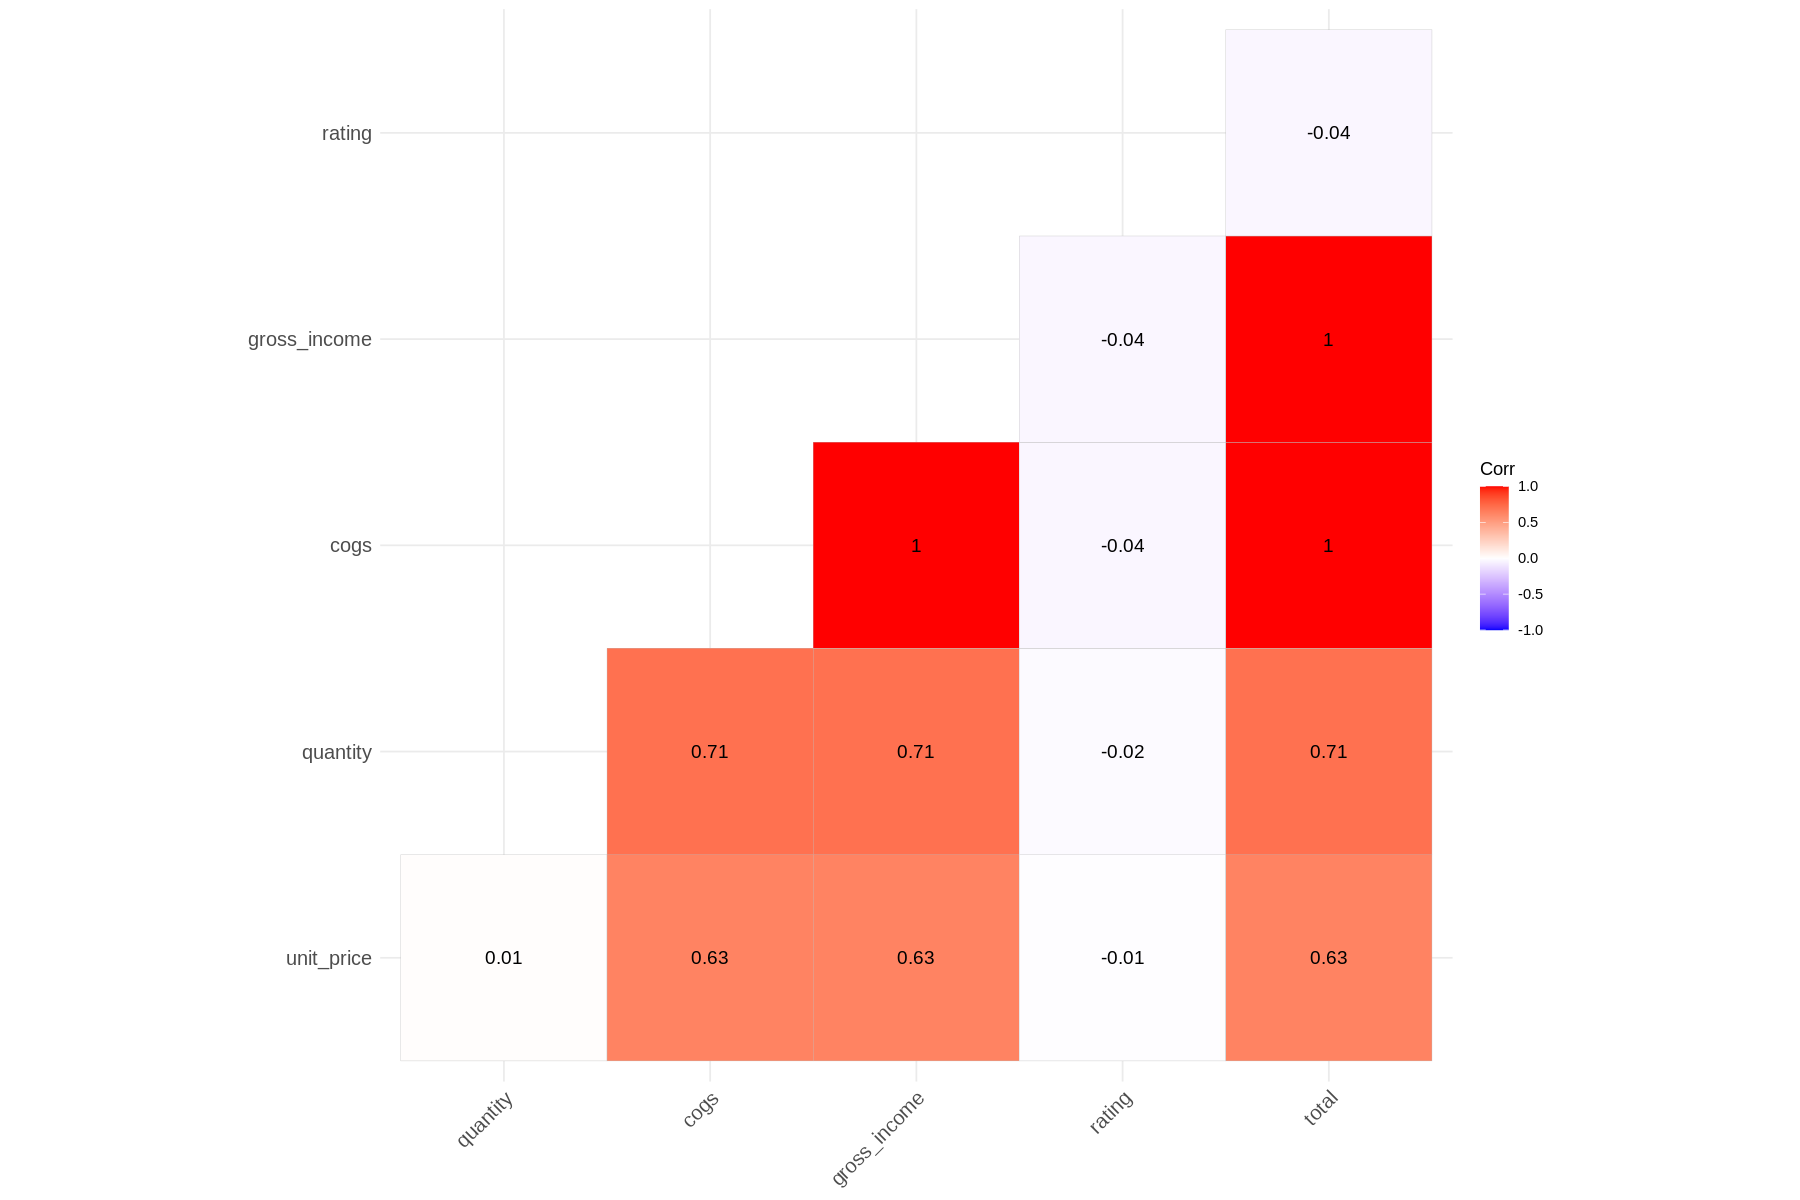

In [ ]:
# compute the correlation coefficients between the numerical variables
corr <- cor(data_num)

# plot a heat map to visualize correlations
options(repr.plot.height = 10, repr.plot.width = 15)

ggcorrplot(round(corr, 2) ,lab = T,type = 'lower')

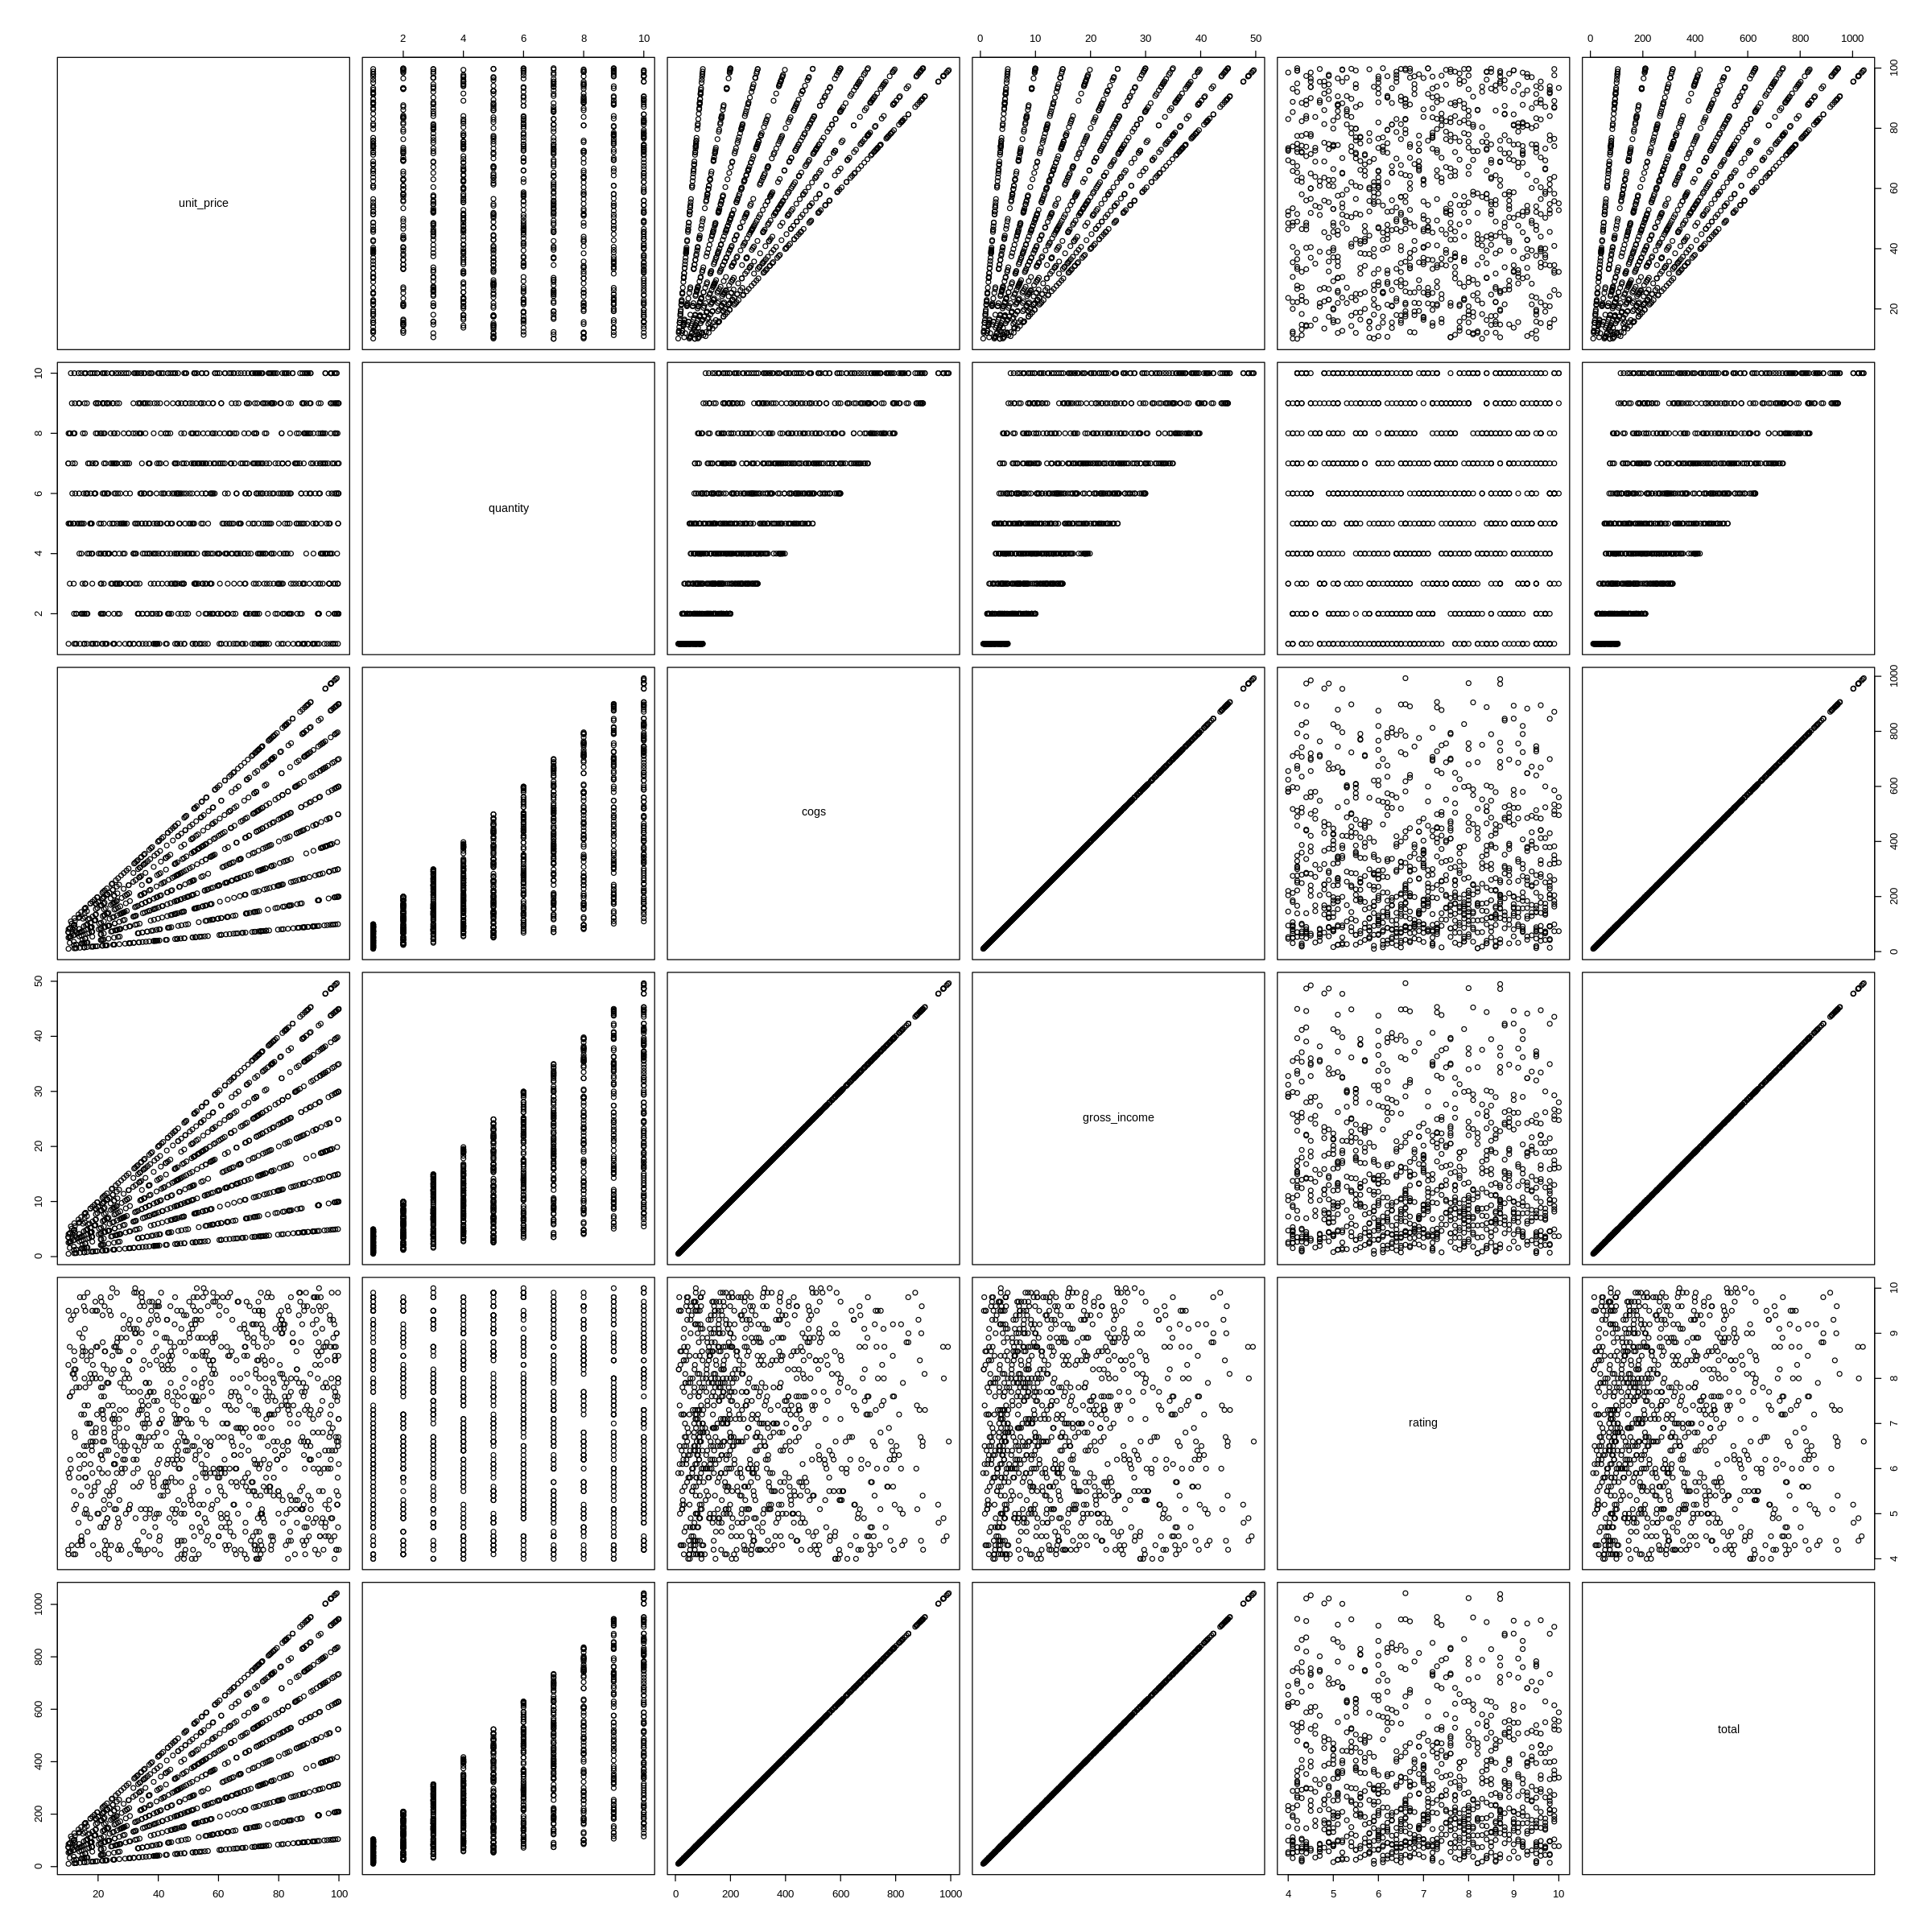

In [ ]:
# plot pair plots to view the distribution of the values per pair of variables
options(repr.plot.height = 20, repr.plot.width = 20)
pairs(data_num)

There is strong to moderate correlation between a majority of the variable pairs

In [ ]:
# find the means of 'unit_price''quantity''cogs''gross_income''rating' and 'total' per branch 
branch_stats <- data1 %>% select(branch, unit_price, quantity, cogs, gross_income, rating, total)%>% group_by(branch)%>%summarise_all(mean) 
branch_stats

branch,unit_price,quantity,cogs,gross_income,rating,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,54.78085,5.467647,297.4800,14.87400,7.027059,312.3540
B,55.65928,5.481928,304.6405,15.23202,6.818072,319.8725
C,56.60902,5.582317,321.0473,16.05237,7.072866,337.0997


In [ ]:
# find the means of 'unit_price''quantity''cogs''gross_income''rating' and 'total' per customer type  
customer_stats <- data1 %>% select(customer_type, unit_price, quantity, cogs, gross_income, rating, total)%>% group_by(customer_type)%>%summarise_all(mean) 
customer_stats

customer_type,unit_price,quantity,cogs,gross_income,rating,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Member,56.20699,5.558882,312.1822,15.60911,6.940319,327.7913
Normal,55.13513,5.460922,302.9741,15.14871,7.005210,318.1229


In [ ]:
# find the means of 'unit_price''quantity''cogs''gross_income''rating' and 'total' per payment type  
payment_stats <- data1 %>% select(payment, unit_price, quantity, cogs, gross_income, rating, total)%>% group_by(payment)%>%summarise_all(mean) 
payment_stats

payment,unit_price,quantity,cogs,gross_income,rating,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cash,56.75898,5.511628,310.6494,15.53247,6.970058,326.1819
Credit card,54.39447,5.536977,308.5808,15.42904,7.003215,324.0099
Ewallet,55.74017,5.484058,303.6387,15.18193,6.947826,318.8206


In [ ]:
# find the means of 'unit_price''quantity''cogs''gross_income''rating' and 'total' per customer type  
pline_stats <- data1 %>% select(product_line, unit_price, quantity, cogs, gross_income, rating, total)%>% group_by(product_line)%>%summarise_all(mean) 
pline_stats

product_line,unit_price,quantity,cogs,gross_income,rating,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Electronic accessories,53.55159,5.711765,304.4119,15.22060,6.924706,319.6325
Fashion accessories,57.15365,5.067416,290.5612,14.52806,7.029213,305.0893
Food and beverages,56.00885,5.471264,307.3062,15.36531,7.113218,322.6715
Health and beauty,54.85447,5.618421,308.2314,15.41157,7.003289,323.6430
Home and lifestyle,55.31694,5.693750,320.6066,16.03033,6.837500,336.6370
Sports and travel,56.99325,5.542169,316.2526,15.81263,6.916265,332.0652


## Implementing the solution
The high correlation between the variables means that there is redundancy within the dataset hence the need for feature selection and dimensionality reduction 

### Feature selection

In [ ]:
# create a copy 0f the dataset
data1_copy <- data1

# rearrange the columns in the dataframe
data1_copy <- data1_copy[, c(5,6,8,9,10,11,1,2,3,4,7)]

# one hot encode the categorical variables
dummy <- dummyVars("~ gender + customer_type + branch + product_line + payment", data=data1_copy)
encoded <- data.frame(predict(dummy, newdata = data1_copy))
data1_copy <- cbind(data1_copy[ , 1:6], encoded)

# preview first few records
head(data1_copy)

unit_price,quantity,cogs,gross_income,rating,total,genderFemale,genderMale,customer_typeMember,customer_typeNormal,⋯,branchC,product_lineElectronic.accessories,product_lineFashion.accessories,product_lineFood.and.beverages,product_lineHealth.and.beauty,product_lineHome.and.lifestyle,product_lineSports.and.travel,paymentCash,paymentCredit.card,paymentEwallet
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74.69,7,522.83,26.1415,9.1,548.9715,1,0,1,0,⋯,0,0,0,0,1,0,0,0,0,1
15.28,5,76.40,3.8200,9.6,80.2200,1,0,0,1,⋯,1,1,0,0,0,0,0,1,0,0
46.33,7,324.31,16.2155,7.4,340.5255,0,1,0,1,⋯,0,0,0,0,0,1,0,0,1,0
58.22,8,465.76,23.2880,8.4,489.0480,0,1,1,0,⋯,0,0,0,0,1,0,0,0,0,1
86.31,7,604.17,30.2085,5.3,634.3785,0,1,0,1,⋯,0,0,0,0,0,0,1,0,0,1
85.39,7,597.73,29.8865,4.1,627.6165,0,1,0,1,⋯,1,1,0,0,0,0,0,0,0,1


In [ ]:
# remove 'total' column as it is the dependant variable
data1_copy <- subset(data1_copy, select = -c(total))

In [ ]:
# Determining the correlated features


# create correlation matrix
correlationMatrix <- cor(data1_copy)

# find variables that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75) # selects features with more than 0.

# print indexes of highly correlated attributes
highlyCorrelated

[1] 3 6 8

In [ ]:
# remove redundant Features 

data2 <- subset(data1_copy, select = -c(highlyCorrelated))

In [ ]:
# install corrplot package
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.89 loaded



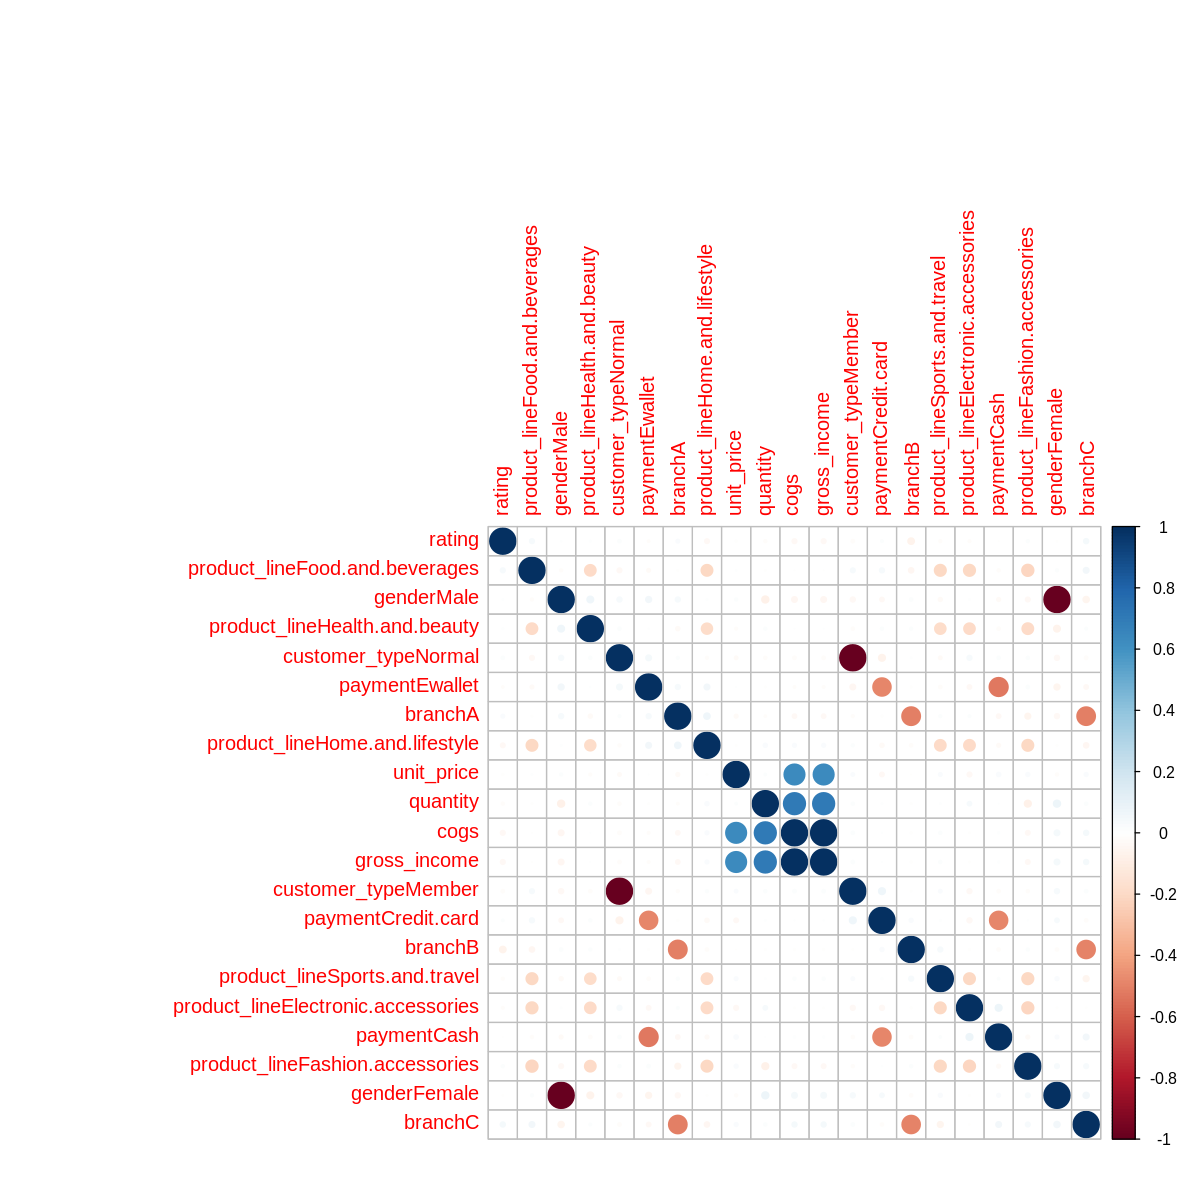

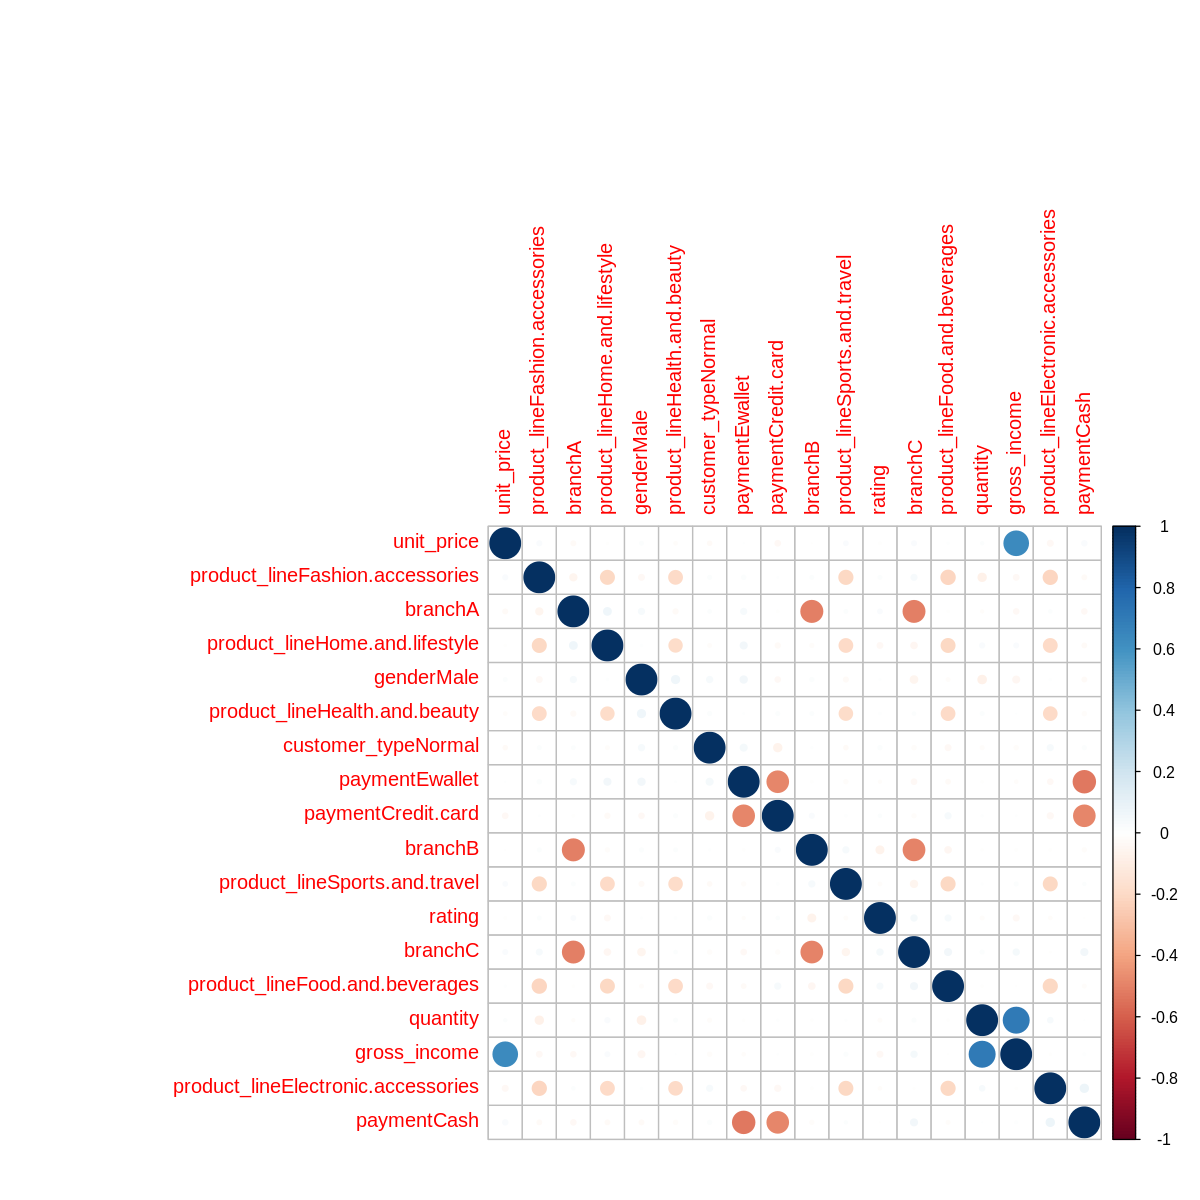

In [ ]:
# Performing our graphical comparison of the correlation matrices before and after feature selection
options(repr.plot.height = 10, repr.plot.width = 10)

#par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(data2), order = "hclust")

In [ ]:
# view names of selected features
names(data2)

[1] "unit_price"                         "quantity"                          
 [3] "gross_income"                       "rating"                            
 [5] "genderMale"                         "customer_typeNormal"               
 [7] "branchA"                            "branchB"                           
 [9] "branchC"                            "product_lineElectronic.accessories"
[11] "product_lineFashion.accessories"    "product_lineFood.and.beverages"    
[13] "product_lineHealth.and.beauty"      "product_lineHome.and.lifestyle"    
[15] "product_lineSports.and.travel"      "paymentCash"                       
[17] "paymentCredit.card"                 "paymentEwallet"

Insights  
The above are the variables to consider in an analysis in order to avoid redundancy



### Dimensionality reduction

In [ ]:
# pass dataframe to the prcomp() 
# set two arguments, center and scale to be TRUE then preview the object with summary
data1.pca <- prcomp(data2, center = TRUE, scale. = TRUE)
summary(data1.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     1.4064 1.27453 1.24702 1.22392 1.21666 1.1104 1.09561
Proportion of Variance 0.1099 0.09025 0.08639 0.08322 0.08224 0.0685 0.06669
Cumulative Proportion  0.1099 0.20013 0.28652 0.36974 0.45198 0.5205 0.58717
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.09045 1.08446 1.08032 1.00915 0.99550 0.97538 0.93895
Proportion of Variance 0.06606 0.06534 0.06484 0.05658 0.05506 0.05285 0.04898
Cumulative Proportion  0.65323 0.71857 0.78341 0.83998 0.89504 0.94789 0.99687
                          PC15      PC16      PC17      PC18
Standard deviation     0.23722 3.253e-16 2.939e-16 2.107e-16
Proportion of Variance 0.00313 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.000e+00 1.000e+00 1.000e+00

* PC1 explains 11%  of the variation in the dataset
* Each of the remaining components explain less than 10% of the variation in the dataset
* 3 components do not contribute to the variations in the dataset

In [ ]:
# call str() to have a look at your PCA object
str(data1.pca)

List of 5
 $ sdev    : num [1:18] 1.41 1.27 1.25 1.22 1.22 ...
 $ rotation: num [1:18, 1:18] -0.4598 -0.5185 -0.6904 0.0368 0.0829 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:18] "unit_price" "quantity" "gross_income" "rating" ...
  .. ..$ : chr [1:18] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:18] 55.672 5.51 15.379 6.973 0.499 ...
  ..- attr(*, "names")= chr [1:18] "unit_price" "quantity" "gross_income" "rating" ...
 $ scale   : Named num [1:18] 26.49 2.92 11.71 1.72 0.5 ...
  ..- attr(*, "names")= chr [1:18] "unit_price" "quantity" "gross_income" "rating" ...
 $ x       : num [1:1000, 1:18] -0.998 1.108 0.145 -0.571 -1.349 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:18] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


The PCA object contains the following information:

* The center point, scaling, standard deviation of each principal component
* The relationship between the initial variables and the principal components 
* The values of each sample in terms of the principal components 

In [ ]:
# install ggbiplot
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)

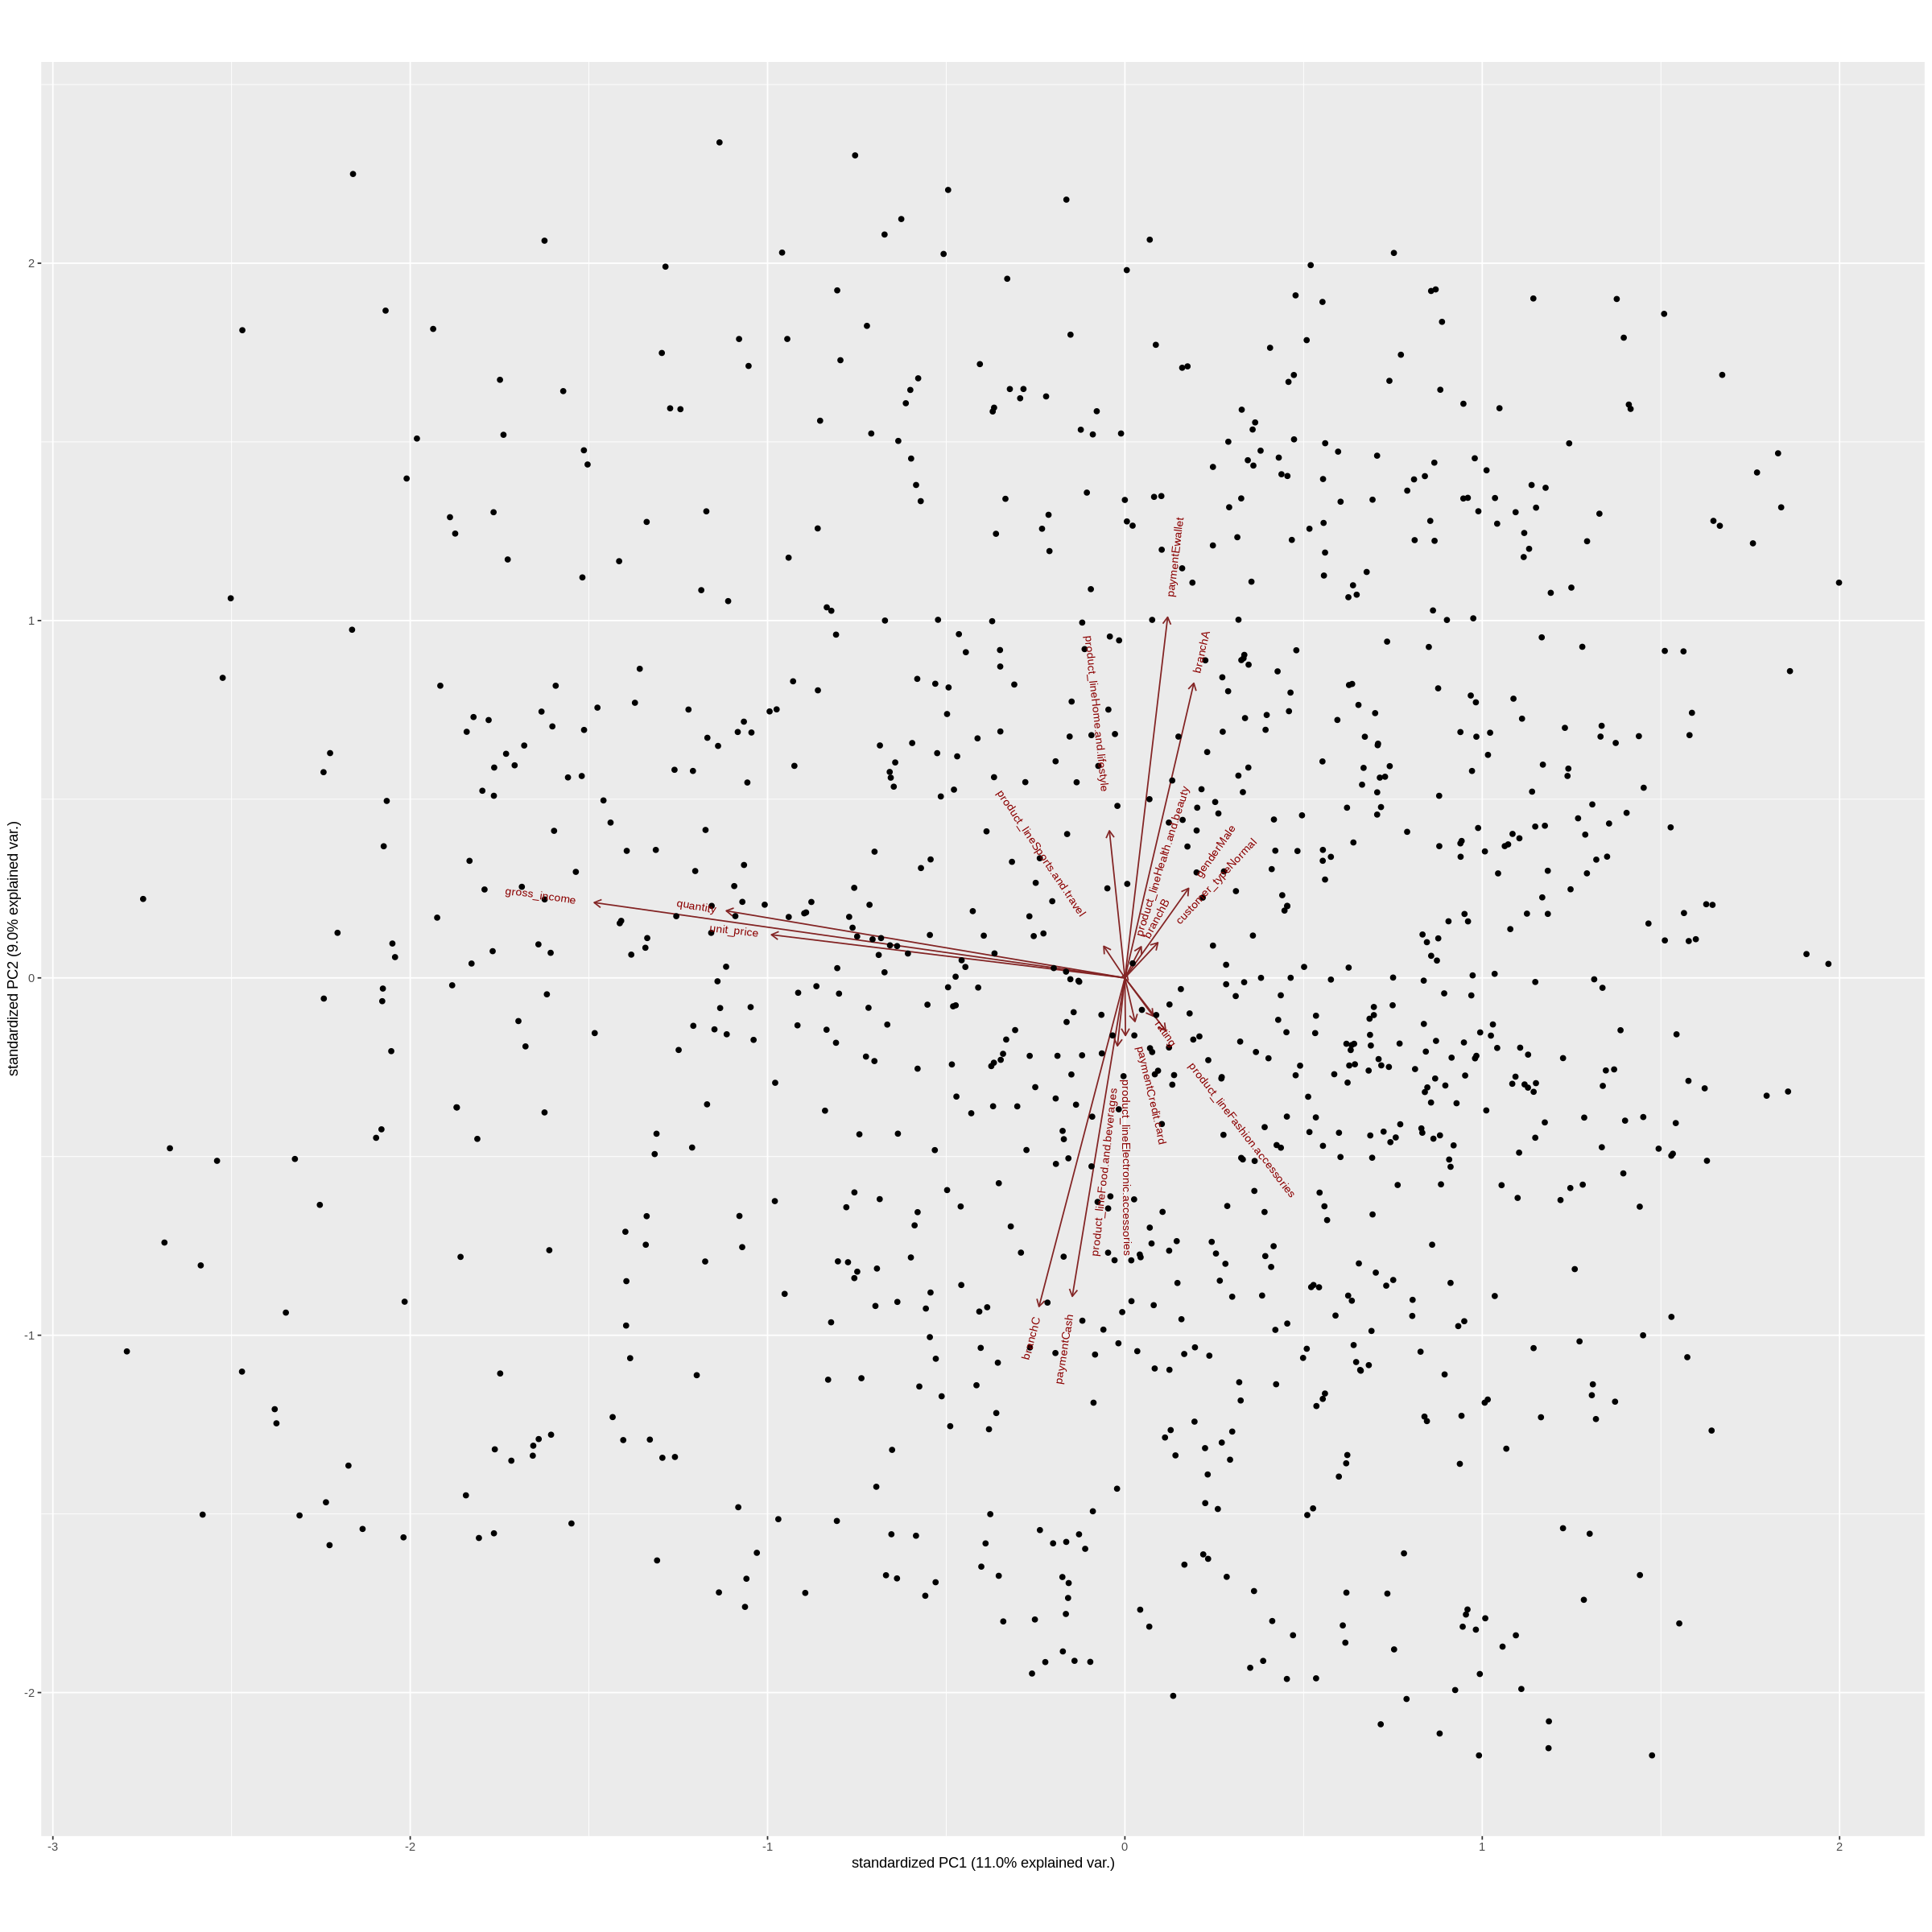

In [ ]:
# find out which variables constitute the first two dominant principal components
options(repr.plot.height = 20, repr.plot.width = 20)

ggbiplot(data1.pca)

General Observations
* The variables that largely contribute to the first dominant principal components are 'paymentEwallet', 'branchA', 'branchC', 'paymentCash', 'quantity', 'gross_income', and 'unit_price'
* Since each principal component only explains a very small portion of the variation in the dataset, knowing the position of a sample in relation to just PC1 and PC2, wiil not give an accurate view on where it stands in relation to other samples


## Part 3
  
**Objective**  
To create association rules that will allow us to identify relationships between variables in the dataset



## Loading relevant packages

In [ ]:
install.packages('arules')
library(arules)

## Loading the dataset

In [ ]:
# load the dataset using fread() funcion and instantiate it
data3 <-read.transactions("/content/Supermarket_Sales_Dataset II.csv", sep = ",", rm.duplicates = TRUE)

distribution of transactions with duplicates:
1 
5 


## Reading the data

In [ ]:
# check info on the data
data3

transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [ ]:
# verify the object's class
class(data3)

[1] "transactions"
attr(,"package")
[1] "arules"

In [ ]:
# preview first 5 transactions
inspect(data3[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [ ]:
# generate a summary of the transaction dataset
summary(data3)
# This gives us some information on the most purchased items, distribution of the item sets (no. of items purchased in each transaction), etc.

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

The top 5 most frequently bought items are mineral water, eggs, spaghetti, french fries and chocolate

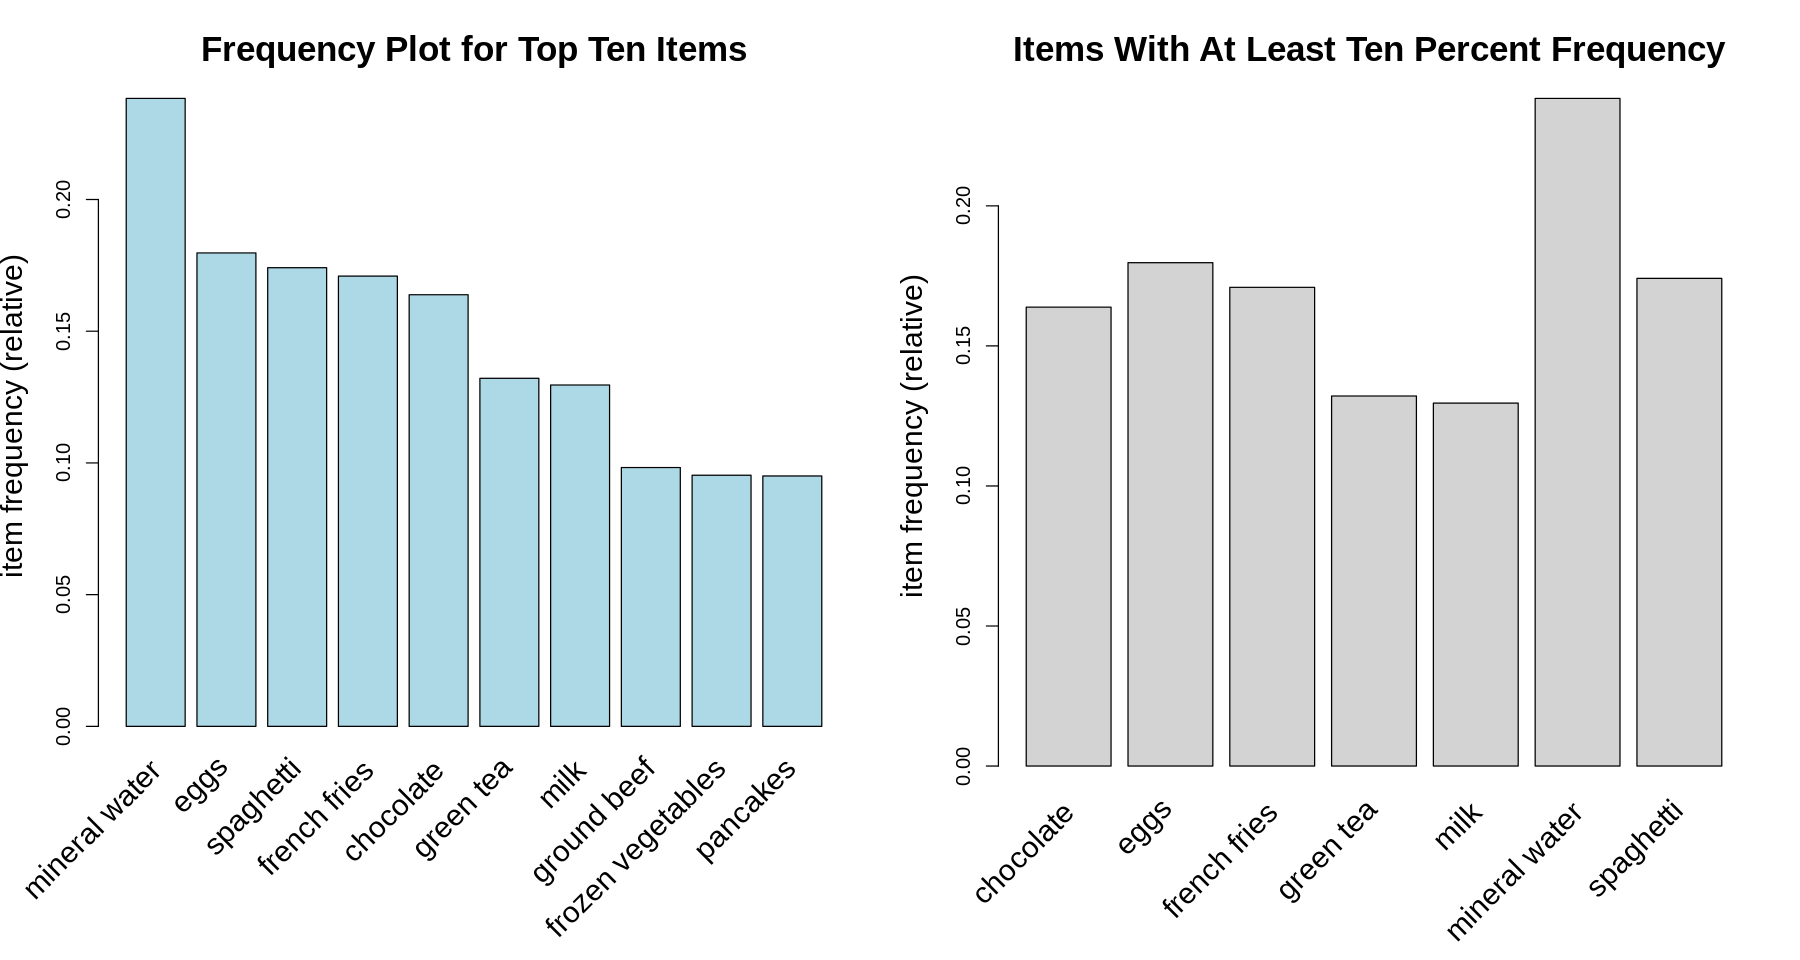

In [ ]:
# Plot bar charts to visualize the frequencies of the most frequent items
options(repr.plot.width = 15, repr.plot.height = 8)

par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(data3, topN = 10,col="lightblue", main = "Frequency Plot for Top Ten Items", cex.main= 1.75, cex = 1.5, , cex.lab=1.5, cex.axis=1)
itemFrequencyPlot(data3, support = 0.1,col="lightgray", main = "Items With At Least Ten Percent Frequency ", cex.main= 1.75, cex = 1.5,  cex.lab=1.5, cex.axis=1)

In [ ]:
# find the 10 least popular items
least_items = itemFrequency(data3, type = "relative")
head(sort(least_items), 10)

water spray         napkins           cream         bramble             tea 
   0.0003999467    0.0006665778    0.0009332089    0.0018664178    0.0038661512 
        chutney   mashed potato chocolate bread    dessert wine         ketchup 
   0.0041327823    0.0041327823    0.0042660979    0.0043994134    0.0043994134

The top 5 least frequently bought items are water spray, napkins, cream, bramble and tea  

## Building a model

In [ ]:
# build a model based on association rules using the apriori function 
# use min Support as 0.001 and confidence as 0.75

rules <- apriori (data3, parameter = list(supp = 0.001, conf = 0.75))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [110 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 110 rules 

We have an average of 75% confidence in 110 rules

In [ ]:
# explore of our model through the use of the summary function 
summary(rules)

set of 110 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
19 68 22  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.045   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.7500   Min.   :0.001067   Min.   : 3.146  
 1st Qu.:0.001067   1st Qu.:0.7692   1st Qu.:0.001333   1st Qu.: 3.356  
 Median :0.001200   Median :0.8000   Median :0.001600   Median : 3.729  
 Mean   :0.001333   Mean   :0.8208   Mean   :0.001637   Mean   : 4.552  
 3rd Qu.:0.001466   3rd Qu.:0.8571   3rd Qu.:0.001733   3rd Qu.: 4.695  
 Max.   :0.003066   Max.   :1.0000   Max.   :0.003999   Max.   :12.722  
     count   
 Min.   : 8  
 1st Qu.: 8  
 Median : 9  
 Mean   :10  
 3rd Qu.:11  
 Max.   :23  

mining info:
  data ntransactions support confidence
 data3          7501   0.001       0.75

The rules are for 3 to 6 item transactions. There are 19 rules for 3 item transactions, 68 rules for 4 item transactions, 22 rules for 5 item transactions and 1 rule for 6 item transactions.

In [ ]:
# observe first 10 rules built in our model
inspect(rules[1:10]) 

     lhs                             rhs             support     confidence
[1]  {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2]  {blueberries,eggs}           => {mineral water} 0.001599787 0.7500000 
[3]  {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[4]  {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[5]  {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[6]  {barbecue sauce,chocolate}   => {mineral water} 0.001333156 0.7692308 
[7]  {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
[8]  {milk,pasta}                 => {shrimp}        0.001599787 0.8571429 
[9]  {mineral water,pasta}        => {shrimp}        0.001599787 0.7500000 
[10] {cooking oil,fromage blanc}  => {mineral water} 0.001199840 0.8181818 
     coverage    lift      count
[1]  0.001199840  3.729058  8   
[2]  0.002133049  3.146393 12   
[3]  0.002133049  4.666587 13   
[4]  0.001466471  3.432428  9   

The results reveal that the model is 95% confident that aperson buying mushroom cream sauce and pasta will buy escalope, 75% confident that a person buying milk and pasta will buy shrimp, etc,.



In [ ]:
# Order the rules by the level of confidence then look at the first 10 rules.
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:10])

     lhs                       rhs                 support confidence    coverage      lift count
[1]  {french fries,                                                                              
      mushroom cream sauce,                                                                      
      pasta}                => {escalope}      0.001066524  1.0000000 0.001066524 12.606723     8
[2]  {ground beef,                                                                               
      light cream,                                                                               
      olive oil}            => {mineral water} 0.001199840  1.0000000 0.001199840  4.195190     9
[3]  {cake,                                                                                      
      meatballs,                                                                                 
      mineral water}        => {milk}          0.001066524  1.0000000 0.001066524  7.717078     8
[4]  {cake,         

There are 4 rules with 100% confidence

In [ ]:
# If we're interested in making a promotion relating to the sale of shrimp, 
# we could create a subset of rules concerning these products 
# This would tell us the items that the customers bought before purchasing shrimp

escalope <- subset(rules, subset = rhs %pin% "escalope")
 
# order by confidence
escalope<-sort(escalope, by="confidence", decreasing=TRUE)
inspect(escalope[])

    lhs                                          rhs        support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope} 0.001066524
[2] {mushroom cream sauce,pasta}              => {escalope} 0.002532996
    confidence coverage    lift     count
[1] 1.00       0.001066524 12.60672  8   
[2] 0.95       0.002666311 11.97639 19   


In [ ]:
# If we wanted to determine the items that customers buying shrimps might buy 

# Subset the rules
shrimp <- subset(rules, subset = lhs %pin% "shrimp")

# Order by confidence
shrimp<-sort(shrimp, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(shrimp[1:5])


    lhs                    rhs                 support confidence    coverage     lift count
[1] {cake,                                                                                  
     olive oil,                                                                             
     shrimp}            => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[2] {chocolate,                                                                             
     frozen vegetables,                                                                     
     olive oil,                                                                             
     shrimp}            => {mineral water} 0.001199840  0.9000000 0.001333156 3.775671     9
[3] {light cream,                                                                           
     mineral water,                                                                         
     shrimp}            => {spaghetti}     0.001066524  0.8888889 0.00

## Recommendations  
* A marketer wanting to promote the sales of escalope could bundle it up with pasta, mushroom cream sauce and french fries during the promotion season
* Advertising campaign photos and videos of escalopes could have pasta, mushroom cream sauce and french fries within the frame and vice versa
* Shrimps could be bundled up with light cream, water and spaghetti, or with cake, olive oil and water, etc, during the promotion season



## Part 4
  
**Objectives**  
To check whether there are any anomalies (fraud) in the given sales dataset

## Loading relevant packages

In [ ]:
install.packages("anomalize")
library(anomalize)
install.packages('tibbletime')
library(tibbletime)
install.packages('timetk')
library(timetk)

## Loading the dataset

In [89]:
data4 <- read.csv('http://bit.ly/CarreFourSalesDataset')

## Reading the dataset

In [90]:
# preview the first few records in the dataset
head(data4)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [91]:
# find number of rows and columns in the dataframe using dim() function
dim(data4)

[1] 1000    2

In [92]:
# find number of duplicated rows using anyDuplicated() function
anyDuplicated(data4)

[1] 0

There are no duplicates

In [93]:
# find the number of missing values in each column using is.na() and colSums() functions
colSums(is.na(data4))

Date Sales 
    0     0

There are no null values

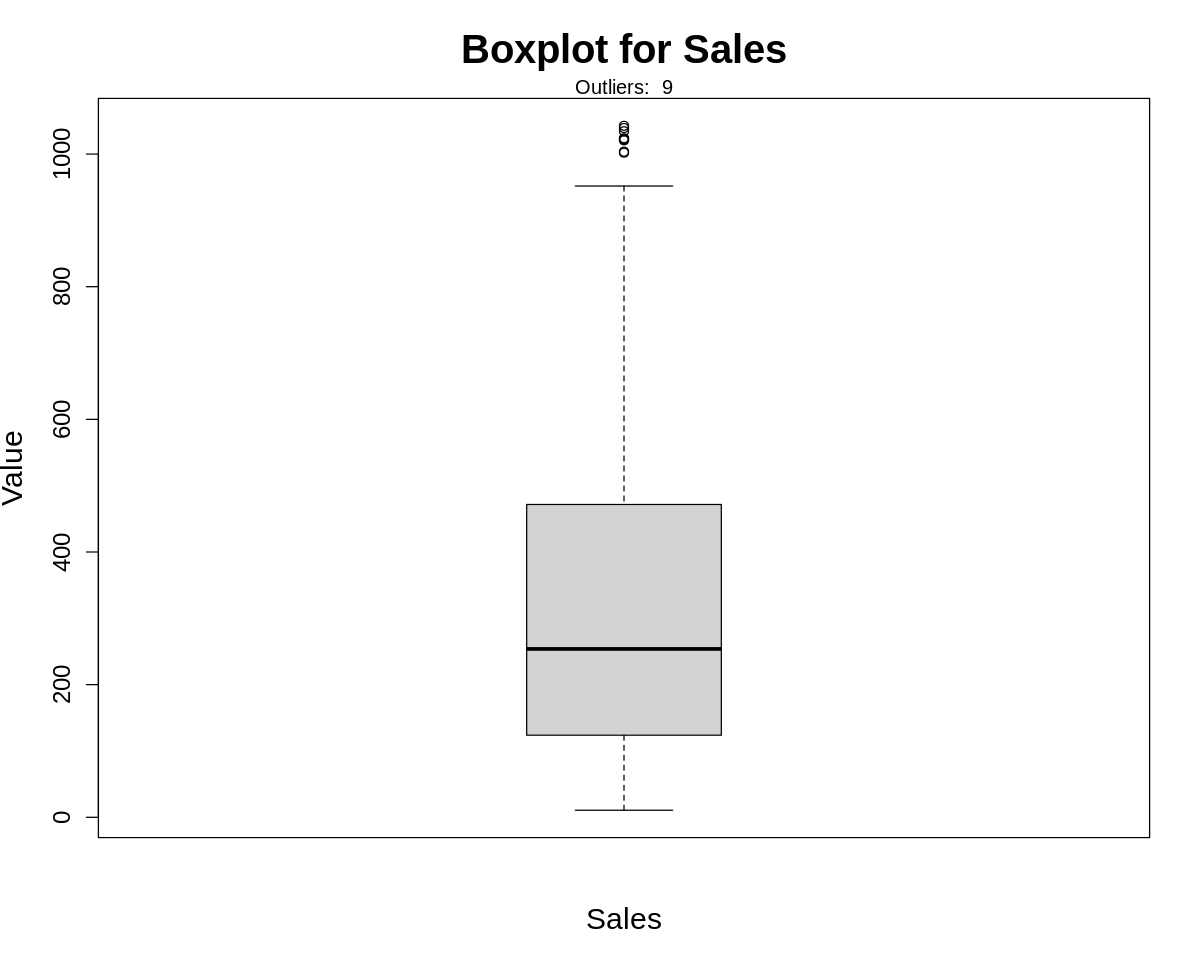

In [94]:
# plot a boxplot to check for outliers in the 'Sales' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data4$Sales, main="Boxplot for Sales", xlab = "Sales", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_sales <- boxplot.stats(data4$Sales)$out
mtext(paste("Outliers: ", paste(length(outlier_sales), collapse=", ")), cex=1)

There are 9 outliers

In [95]:
# check for anomalies in the 'branch' column by scrutinizing its unique values 
print(unique(data4$Date))

 [1] "1/5/2019"  "3/8/2019"  "3/3/2019"  "1/27/2019" "2/8/2019"  "3/25/2019"
 [7] "2/25/2019" "2/24/2019" "1/10/2019" "2/20/2019" "2/6/2019"  "3/9/2019" 
[13] "2/12/2019" "2/7/2019"  "3/29/2019" "1/15/2019" "3/11/2019" "1/1/2019" 
[19] "1/21/2019" "3/5/2019"  "3/15/2019" "2/17/2019" "3/2/2019"  "3/22/2019"
[25] "3/10/2019" "1/25/2019" "1/28/2019" "1/7/2019"  "3/23/2019" "1/17/2019"
[31] "2/2/2019"  "3/4/2019"  "3/16/2019" "2/27/2019" "2/10/2019" "3/19/2019"
[37] "2/3/2019"  "3/7/2019"  "2/28/2019" "3/27/2019" "1/20/2019" "3/12/2019"
[43] "2/15/2019" "3/6/2019"  "2/14/2019" "3/13/2019" "1/24/2019" "1/6/2019" 
[49] "2/11/2019" "1/22/2019" "1/13/2019" "1/9/2019"  "1/12/2019" "1/26/2019"
[55] "1/23/2019" "2/23/2019" "1/2/2019"  "2/9/2019"  "3/26/2019" "3/1/2019" 
[61] "2/1/2019"  "3/28/2019" "3/24/2019" "2/5/2019"  "1/19/2019" "1/16/2019"
[67] "1/8/2019"  "2/18/2019" "1/18/2019" "2/16/2019" "2/22/2019" "1/29/2019"
[73] "1/4/2019"  "3/30/2019" "1/30/2019" "1/3/2019"  "3/21/2019" "2/13/2019"

There are 89 unique dates and no anomalies

In [96]:
# convert 'Date' to date object
data4$Date = as.Date(data4$Date, format = "%m/%d/%y")


## Univariate analysis

In [97]:
# identify numerical variables in the data1frame
nums <- unlist(lapply(data4, is.numeric))

# create a subset that contains the numerical variables
numerics <- subset(data4, select=nums) 

In [98]:
# compute the measures of cenral tendancy and the measures of dispersion of the numerical variables and contain them in a data1frame
statistics <- data.frame(
  Mean = apply(numerics, 2, mean), 
  Median = apply(numerics, 2, median), 
  Min = apply(numerics, 2, min),  
  Max = apply(numerics, 2, max),    
  Variance= apply(numerics, 2, var),  
  Std = apply(numerics, 2, sd),
  Skewness = apply(numerics, 2, skewness), 
  Kurtosis = apply(numerics, 2, kurtosis)) 

# round off the values to 2 decimal places and display the data1frame
statistics <- round(statistics, 2)
statistics

,Mean,Median,Min,Max,Variance,Std,Skewness,Kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sales,322.97,253.85,10.68,1042.65,60459.6,245.89,0.89,2.91


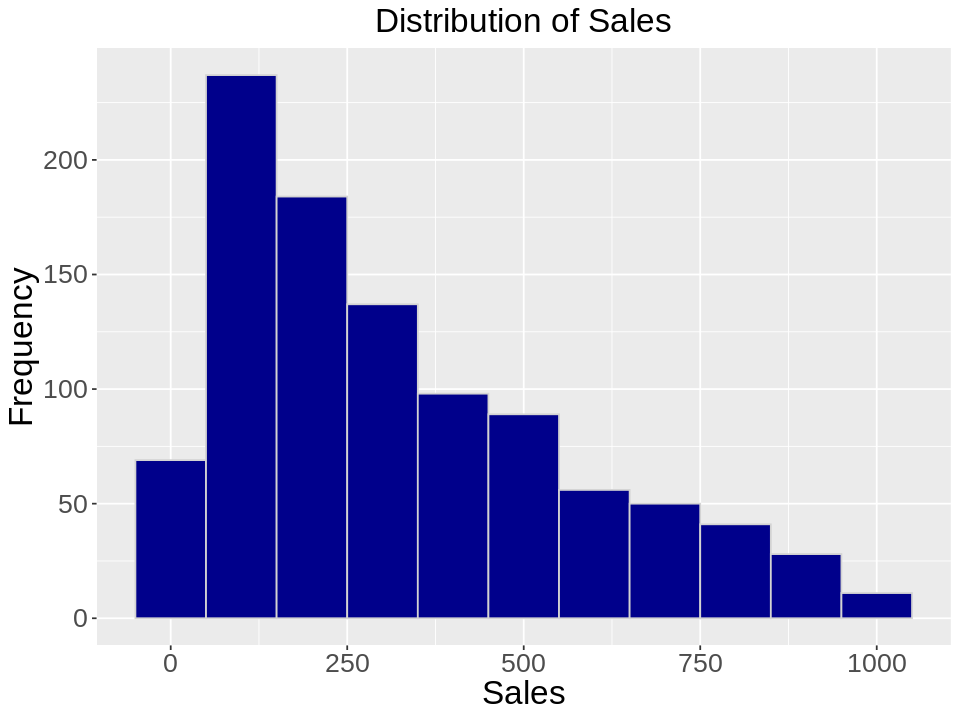

In [99]:
# plot a histogram to visualize the distribution of values in 'Sales' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data4 %>% ggplot(aes(x = Sales ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 100) +
    labs(title = "Distribution of Sales", x = "Sales", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

In [100]:
# find the earliest and latest dates 
paste(c('Earliest:'), min(data4$Date))
paste(c('Latest:'), max(data4$Date))

[1] "Earliest: 2020-01-01"

[1] "Latest: 2020-03-30"

## Implementing the solution

In [101]:
# sort the table in ascending order of 'date'
data4  = data4[order(data4$Date),]    

# convert dataset to tibble
data4_tb <- as_tibble(data4)
head(data4_tb)

In [106]:
# anomaly detection using total sales per day
x <- data4_tb %>% 
  as_tbl_time(Sales,  merge = TRUE) %>% 
  time_decompose(sum) %>% 
  anomalize(remainder) %>% 
  time_recompose()%>%
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

ERROR: ignored